In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/updated_dataset (1).csv', parse_dates=['date'])

In [ ]:
df.head()

date  reactive power  active power  apparent power  \
0 2016-01-11 17:00:00              24            66       70.228199   
1 2016-01-11 17:10:00              24            66       70.228199   
2 2016-01-11 17:20:00              20            60       63.245553   
3 2016-01-11 17:30:00              20            70       72.801099   
4 2016-01-11 17:40:00              24            76       79.699435   

   power factor     t1       rh_1    t2       rh_2     t3  ...         t9  \
0      0.939793  19.89  47.596667  19.2  44.790000  19.79  ...  17.033333   
1      0.939793  19.89  46.693333  19.2  44.722500  19.79  ...  17.066667   
2      0.948683  19.89  46.300000  19.2  44.626667  19.79  ...  17.000000   
3      0.961524  19.89  46.066667  19.2  44.590000  19.79  ...  17.000000   
4      0.953583  19.89  46.333333  19.2  44.530000  19.79  ...  17.000000   

    rh_9     t_out  press_mm_hg  rh_out  windspeed  visibility  tdewpoint  \
0  45.53  6.600000        733.5    92.0   7.000000   63.000000        5.3   
1  45.56  6.483333        733.6    92.0   6.666667   59.166667        5.2   
2  45.50  6.366667        733.7    92.0   6.333333   55.333333        5.1   
3  45.40  6.250000        733.8    92.0   6.000000   51.500000        5.0   
4  45.40  6.133333        733.9    92.0   5.666667   47.666667        4.9   

         rv1        rv2  
0  13.275433  13.275433  
1  18.606195  18.606195  
2  28.642668  28.642668  
3  45.410389  45.410389  
4  10.084097  10.084097  

[5 rows x 31 columns]

In [ ]:
df

date  reactive power  active power  apparent power  \
0     2016-01-11 17:00:00              24            66       70.228199   
1     2016-01-11 17:10:00              24            66       70.228199   
2     2016-01-11 17:20:00              20            60       63.245553   
3     2016-01-11 17:30:00              20            70       72.801099   
4     2016-01-11 17:40:00              24            76       79.699435   
...                   ...             ...           ...             ...   
19730 2016-05-27 17:20:00              40            60       72.111026   
19731 2016-05-27 17:30:00              36            54       64.899923   
19732 2016-05-27 17:40:00             108           172      203.096036   
19733 2016-05-27 17:50:00             168           262      311.236245   
19734 2016-05-27 18:00:00             172           268      318.446228   

       power factor         t1       rh_1         t2       rh_2         t3  \
0          0.939793  19.890000  47.596667  19.200000  44.790000  19.790000   
1          0.939793  19.890000  46.693333  19.200000  44.722500  19.790000   
2          0.948683  19.890000  46.300000  19.200000  44.626667  19.790000   
3          0.961524  19.890000  46.066667  19.200000  44.590000  19.790000   
4          0.953583  19.890000  46.333333  19.200000  44.530000  19.790000   
...             ...        ...        ...        ...        ...        ...   
19730      0.832050  25.566667  46.560000  25.890000  42.025714  27.200000   
19731      0.832050  25.500000  46.500000  25.754000  42.080000  27.133333   
19732      0.846890  25.500000  46.596667  25.628571  42.768571  27.050000   
19733      0.841804  25.500000  46.990000  25.414000  43.036000  26.890000   
19734      0.841586  25.500000  46.600000  25.264286  42.971429  26.823333   

       ...         t9     rh_9      t_out  press_mm_hg     rh_out  windspeed  \
0      ...  17.033333  45.5300   6.600000        733.5  92.000000   7.000000   
1      ...  17.066667  45.5600   6.483333        733.6  92.000000   6.666667   
2      ...  17.000000  45.5000   6.366667        733.7  92.000000   6.333333   
3      ...  17.000000  45.4000   6.250000        733.8  92.000000   6.000000   
4      ...  17.000000  45.4000   6.133333        733.9  92.000000   5.666667   
...    ...        ...      ...        ...          ...        ...        ...   
19730  ...  23.200000  46.7900  22.733333        755.2  55.666667   3.333333   
19731  ...  23.200000  46.7900  22.600000        755.2  56.000000   3.500000   
19732  ...  23.200000  46.7900  22.466667        755.2  56.333333   3.666667   
19733  ...  23.200000  46.8175  22.333333        755.2  56.666667   3.833333   
19734  ...  23.200000  46.8450  22.200000        755.2  57.000000   4.000000   

       visibility  tdewpoint        rv1        rv2  
0       63.000000   5.300000  13.275433  13.275433  
1       59.166667   5.200000  18.606195  18.606195  
2       55.333333   5.100000  28.642668  28.642668  
3       51.500000   5.000000  45.410389  45.410389  
4       47.666667   4.900000  10.084097  10.084097  
...           ...        ...        ...        ...  
19730   23.666667  13.333333  43.096812  43.096812  
19731   24.500000  13.300000  49.282940  49.282940  
19732   25.333333  13.266667  29.199117  29.199117  
19733   26.166667  13.233333   6.322784   6.322784  
19734   27.000000  13.200000  34.118851  34.118851  

[19735 rows x 31 columns]

In [ ]:
df.columns = [x.lower() for x in df.columns]

In [ ]:
df = df.set_index('date')

In [ ]:
df.head()

reactive power  active power  apparent power  \
date                                                                
2016-01-11 17:00:00              24            66       70.228199   
2016-01-11 17:10:00              24            66       70.228199   
2016-01-11 17:20:00              20            60       63.245553   
2016-01-11 17:30:00              20            70       72.801099   
2016-01-11 17:40:00              24            76       79.699435   

                     power factor     t1       rh_1    t2       rh_2     t3  \
date                                                                          
2016-01-11 17:00:00      0.939793  19.89  47.596667  19.2  44.790000  19.79   
2016-01-11 17:10:00      0.939793  19.89  46.693333  19.2  44.722500  19.79   
2016-01-11 17:20:00      0.948683  19.89  46.300000  19.2  44.626667  19.79   
2016-01-11 17:30:00      0.961524  19.89  46.066667  19.2  44.590000  19.79   
2016-01-11 17:40:00      0.953583  19.89  46.333333  19.2  44.530000  19.79   

                          rh_3  ...         t9   rh_9     t_out  press_mm_hg  \
date                            ...                                            
2016-01-11 17:00:00  44.730000  ...  17.033333  45.53  6.600000        733.5   
2016-01-11 17:10:00  44.790000  ...  17.066667  45.56  6.483333        733.6   
2016-01-11 17:20:00  44.933333  ...  17.000000  45.50  6.366667        733.7   
2016-01-11 17:30:00  45.000000  ...  17.000000  45.40  6.250000        733.8   
2016-01-11 17:40:00  45.000000  ...  17.000000  45.40  6.133333        733.9   

                     rh_out  windspeed  visibility  tdewpoint        rv1  \
date                                                                       
2016-01-11 17:00:00    92.0   7.000000   63.000000        5.3  13.275433   
2016-01-11 17:10:00    92.0   6.666667   59.166667        5.2  18.606195   
2016-01-11 17:20:00    92.0   6.333333   55.333333        5.1  28.642668   
2016-01-11 17:30:00    92.0   6.000000   51.500000        5.0  45.410389   
2016-01-11 17:40:00    92.0   5.666667   47.666667        4.9  10.084097   

                           rv2  
date                            
2016-01-11 17:00:00  13.275433  
2016-01-11 17:10:00  18.606195  
2016-01-11 17:20:00  28.642668  
2016-01-11 17:30:00  45.410389  
2016-01-11 17:40:00  10.084097  

[5 rows x 30 columns]

In [ ]:
df.shape

(19735, 30)

In [ ]:
df.isnull().sum()

reactive power    0
active power      0
apparent power    0
power factor      0
t1                0
rh_1              0
t2                0
rh_2              0
t3                0
rh_3              0
t4                0
rh_4              0
t5                0
rh_5              0
t6                0
rh_6              0
t7                0
rh_7              0
t8                0
rh_8              0
t9                0
rh_9              0
t_out             0
press_mm_hg       0
rh_out            0
windspeed         0
visibility        0
tdewpoint         0
rv1               0
rv2               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reactive power  19735 non-null  int64  
 1   active power    19735 non-null  int64  
 2   apparent power  19735 non-null  float64
 3   power factor    19735 non-null  float64
 4   t1              19735 non-null  float64
 5   rh_1            19735 non-null  float64
 6   t2              19735 non-null  float64
 7   rh_2            19735 non-null  float64
 8   t3              19735 non-null  float64
 9   rh_3            19735 non-null  float64
 10  t4              19735 non-null  float64
 11  rh_4            19735 non-null  float64
 12  t5              19735 non-null  float64
 13  rh_5            19735 non-null  float64
 14  t6              19735 non-null  float64
 15  rh_6            19735 non-null  float64
 16  t7              19735 non-null  float64
 

In [ ]:
df.describe()

reactive power  active power  apparent power  power factor  \
count    19735.000000   19735.00000    19735.000000  19735.000000   
mean        39.077983      62.41885       73.746103      0.844644   
std         41.009956      63.55849       75.539468      0.026477   
min          4.000000       6.00000        7.211103      0.832050   
25%         20.000000      30.00000       36.055513      0.832050   
50%         24.000000      40.00000       44.721360      0.832050   
75%         40.000000      66.00000       75.153177      0.832050   
max        432.000000     678.00000      803.932833      0.970143   

                 t1          rh_1            t2          rh_2            t3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     40.259739     20.341219     40.420420     22.267611   
std        1.606066      3.979299      2.192974      4.069813      2.006111   
min       16.790000     27.023333     16.100000     20.463333     17.200000   
25%       20.760000     37.333333     18.790000     37.900000     20.790000   
50%       21.600000     39.656667     20.000000     40.500000     22.100000   
75%       22.600000     43.066667     21.500000     43.260000     23.290000   
max       26.260000     63.360000     29.856667     56.026667     29.236000   

               rh_3  ...            t9          rh_9         t_out  \
count  19735.000000  ...  19735.000000  19735.000000  19735.000000   
mean      39.242500  ...     19.485828     41.552401      7.411665   
std        3.254576  ...      2.014712      4.151497      5.317409   
min       28.766667  ...     14.890000     29.166667     -5.000000   
25%       36.900000  ...     18.000000     38.500000      3.666667   
50%       38.530000  ...     19.390000     40.900000      6.916667   
75%       41.760000  ...     20.600000     44.338095     10.408333   
max       50.163333  ...     24.500000     53.326667     26.100000   

        press_mm_hg        rh_out     windspeed    visibility     tdewpoint  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean     755.522602     79.750418      4.039752     38.330834      3.760707   
std        7.399441     14.901088      2.451221     11.794719      4.194648   
min      729.300000     24.000000      0.000000      1.000000     -6.600000   
25%      750.933333     70.333333      2.000000     29.000000      0.900000   
50%      756.100000     83.666667      3.666667     40.000000      3.433333   
75%      760.933333     91.666667      5.500000     40.000000      6.566667   
max      772.300000    100.000000     14.000000     66.000000     15.500000   

                rv1           rv2  
count  19735.000000  19735.000000  
mean      24.988033     24.988033  
std       14.496634     14.496634  
min        0.005322      0.005322  
25%       12.497889     12.497889  
50%       24.897653     24.897653  
75%       37.583769     37.583769  
max       49.996530     49.996530  

[8 rows x 30 columns]

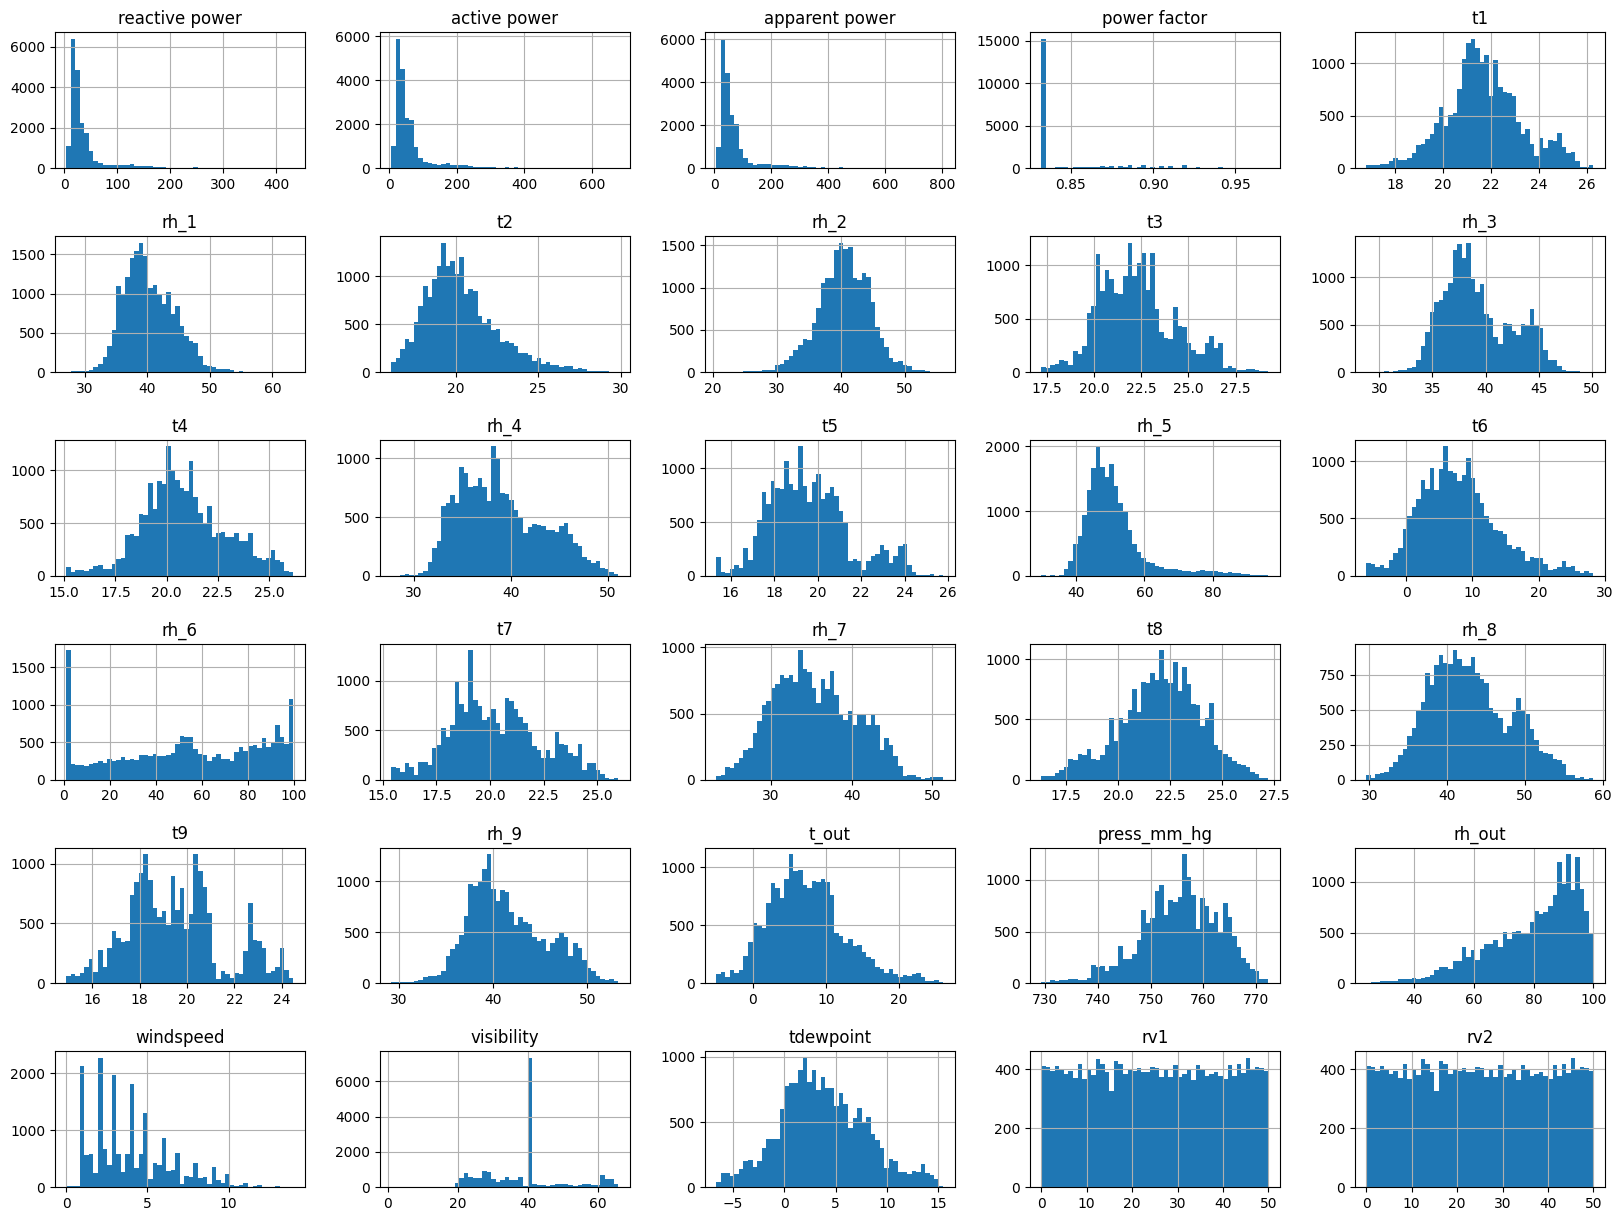

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
df.corr()

reactive power  active power  apparent power  power factor  \
reactive power        1.000000      0.992480        0.995944     -0.017231   
active power          0.992480      1.000000        0.999465      0.093985   
apparent power        0.995944      0.999465        1.000000      0.064834   
power factor         -0.017231      0.093985        0.064834      1.000000   
t1                    0.055447      0.050727        0.052156     -0.028773   
rh_1                  0.086031      0.096621        0.093925      0.074475   
t2                    0.120073      0.115511        0.116967     -0.026696   
rh_2                 -0.060465     -0.052155       -0.054433      0.054491   
t3                    0.085060      0.070164        0.074351     -0.104968   
rh_3                  0.036292      0.051502        0.047469      0.093962   
t4                    0.040281      0.037880        0.038714     -0.005467   
rh_4                  0.016965      0.030771        0.027128      0.093918   
t5                    0.019760      0.009292        0.012203     -0.067165   
rh_5                  0.006955      0.024365        0.019754      0.130671   
t6                    0.117638      0.103988        0.107866     -0.093882   
rh_6                 -0.083178     -0.061305       -0.067309      0.151442   
t7                    0.025801      0.008072        0.012892     -0.126320   
rh_7                 -0.055642     -0.049475       -0.051190      0.035804   
t8                    0.039572      0.029377        0.032222     -0.063037   
rh_8                 -0.094039     -0.089402       -0.090758      0.023465   
t9                    0.010010     -0.009989       -0.004557     -0.143693   
rh_9                 -0.051462     -0.050902       -0.051127     -0.010457   
t_out                 0.099155      0.086674        0.090205     -0.087953   
press_mm_hg          -0.034885     -0.035084       -0.035147     -0.002935   
rh_out               -0.152282     -0.138828       -0.142638      0.092257   
windspeed             0.087122      0.091848        0.090690      0.031483   
visibility            0.000230      0.002725        0.002094      0.029033   
tdewpoint             0.015353      0.010324        0.011756     -0.036937   
rv1                  -0.011145     -0.010722       -0.010847      0.005873   
rv2                  -0.011145     -0.010722       -0.010847      0.005873   

                      t1      rh_1        t2      rh_2        t3      rh_3  \
reactive power  0.055447  0.086031  0.120073 -0.060465  0.085060  0.036292   
active power    0.050727  0.096621  0.115511 -0.052155  0.070164  0.051502   
apparent power  0.052156  0.093925  0.116967 -0.054433  0.074351  0.047469   
power factor   -0.028773  0.074475 -0.026696  0.054491 -0.104968  0.093962   
t1              1.000000  0.164006  0.836834 -0.002509  0.892402 -0.028550   
rh_1            0.164006  1.000000  0.269839  0.797535  0.253230  0.844677   
t2              0.836834  0.269839  1.000000 -0.165610  0.735245  0.121497   
rh_2           -0.002509  0.797535 -0.165610  1.000000  0.137319  0.678326   
t3              0.892402  0.253230  0.735245  0.137319  1.000000 -0.011234   
rh_3           -0.028550  0.844677  0.121497  0.678326 -0.011234  1.000000   
t4              0.877001  0.106180  0.762066 -0.047304  0.852778 -0.140457   
rh_4            0.097861  0.880359  0.231563  0.721435  0.122737  0.898978   
t5              0.885247  0.205797  0.720550  0.110409  0.888169 -0.050062   
rh_5           -0.014782  0.303258  0.029595  0.250271 -0.066355  0.375422   
t6              0.654769  0.316141  0.801186 -0.009670  0.686882  0.076833   
rh_6           -0.615045  0.245126 -0.580372  0.389933 -0.647672  0.514912   
t7              0.838705  0.021397  0.663660 -0.051422  0.847374 -0.250090   
rh_7            0.135182  0.801122  0.229212  0.690584  0.172624  0.832685   
t8              0.825413 -0.030053  0.578191 -0.041023  0.795283 -0.283228   
rh_8           -0.006441  0.736196  0

In [ ]:
#sns.pairplot(df)

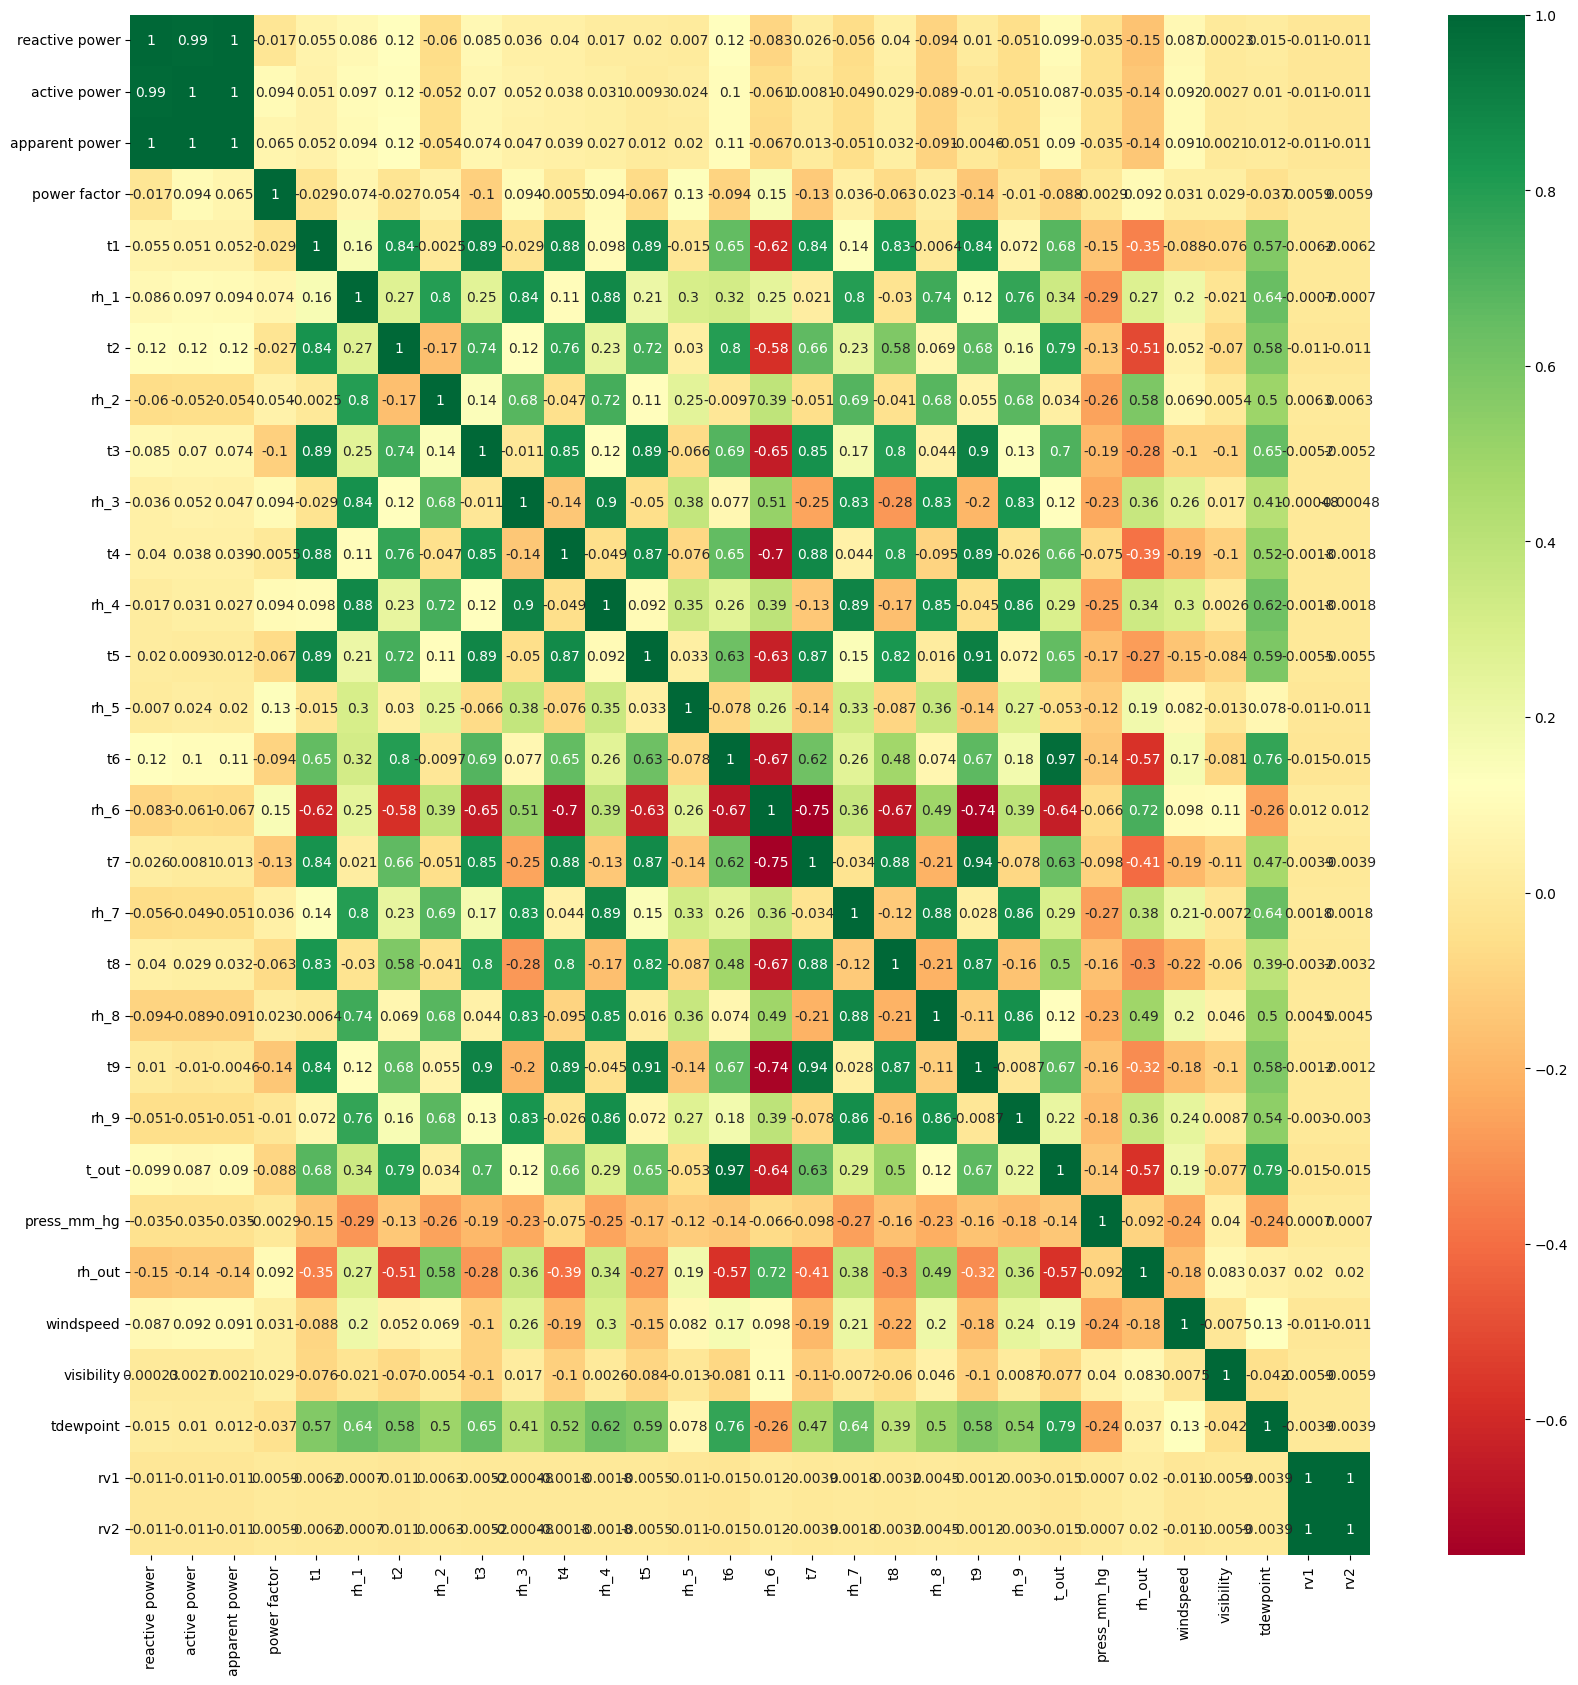

In [ ]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
sorted_appliances = df.sort_values('reactive power', ascending=False)
sorted_appliances.head()

reactive power  active power  apparent power  \
date                                                                
2016-01-16 18:50:00             432           678      803.932833   
2016-01-21 18:50:00             428           672      796.723289   
2016-01-14 17:00:00             364           546      656.210332   
2016-04-04 15:40:00             360           540      648.999230   
2016-01-21 19:00:00             356           554      658.522589   

                     power factor         t1       rh_1         t2       rh_2  \
date                                                                            
2016-01-16 18:50:00      0.843354  21.930000  42.766667  21.040000  38.080000   
2016-01-21 18:50:00      0.843455  19.600000  34.300000  18.426667  33.963333   
2016-01-14 17:00:00      0.832050  21.463333  41.693333  20.856667  38.363333   
2016-04-04 15:40:00      0.832050  23.000000  43.166667  22.200000  40.426667   
2016-01-21 19:00:00      0.841277  19.730000  37.863333  18.566667  34.090000   

                            t3       rh_3  ...     t9       rh_9      t_out  \
date                                       ...                                
2016-01-16 18:50:00  20.700000  40.633333  ...  17.79  40.672500   2.083333   
2016-01-21 18:50:00  18.390000  36.930000  ...  16.00  36.930000  -0.616667   
2016-01-14 17:00:00  21.666667  43.930000  ...  17.00  43.466667   4.600000   
2016-04-04 15:40:00  26.100000  38.930000  ...  20.70  43.333333  14.766667   
2016-01-21 19:00:00  18.390000  36.863333  ...  16.00  36.730000  -0.800000   

                     press_mm_hg     rh_out  windspeed  visibility  tdewpoint  \
date                                                                            
2016-01-16 18:50:00   765.033333  85.500000   3.666667   40.000000  -0.083333   
2016-01-21 18:50:00   764.533333  82.833333   1.000000   64.166667  -3.216667   
2016-01-14 17:00:00   747.900000  76.000000   7.000000   40.000000   0.700000   
2016-04-04 15:40:00   749.266667  59.666667   7.000000   40.000000   7.000000   
2016-01-21 19:00:00   764.500000  84.000000   1.000000   64.000000  -3.200000   

                           rv1        rv2  
date                                       
2016-01-16 18:50:00  27.408521  27.408521  
2016-01-21 18:50:00  11.735734  11.735734  
2016-01-14 17:00:00  18.937972  18.937972  
2016-04-04 15:40:00  15.105153  15.105153  
2016-01-21 19:00:00   3.221583   3.221583  

[5 rows x 30 columns]

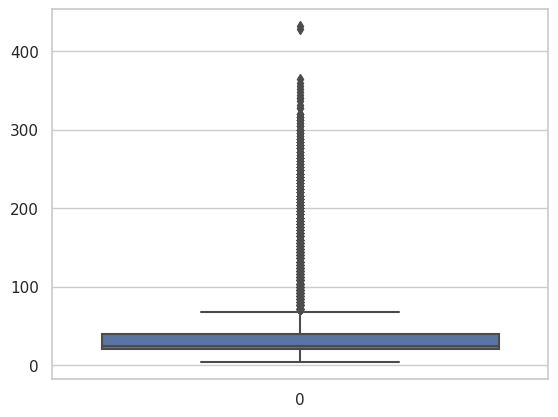

In [ ]:
# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances['reactive power'])

In [ ]:
import pandas as pd

# Assuming sorted_appliances is your DataFrame
# Assuming 'reactive power' is the column of interest

max_drop_point = None
max_drop_threshold = None
max_drop_value = float('-inf')

for threshold_drop in range(1, 100):  # You can adjust the range based on your data characteristics
    # Identify points where a significant drop occurs
    discontinuity_indices = sorted_appliances[sorted_appliances['reactive power'].diff() < -threshold_drop].index

    # Check if the current threshold produces a greater drop
    if len(discontinuity_indices) > 0:
        max_drop_index = sorted_appliances.loc[discontinuity_indices, 'reactive power'].idxmax()
        max_drop = sorted_appliances.loc[max_drop_index, 'reactive power']
        if max_drop > max_drop_value:
            max_drop_value = max_drop
            max_drop_point = max_drop_index
            max_drop_threshold = threshold_drop

# Print the results
print("Maximum Drop Point:", max_drop_point)
print("Maximum Drop Threshold Value:", max_drop_threshold)
print("Maximum Drop Value:", max_drop_value)



Maximum Drop Point: 2016-01-21 18:50:00
Maximum Drop Threshold Value: 1
Maximum Drop Value: 428


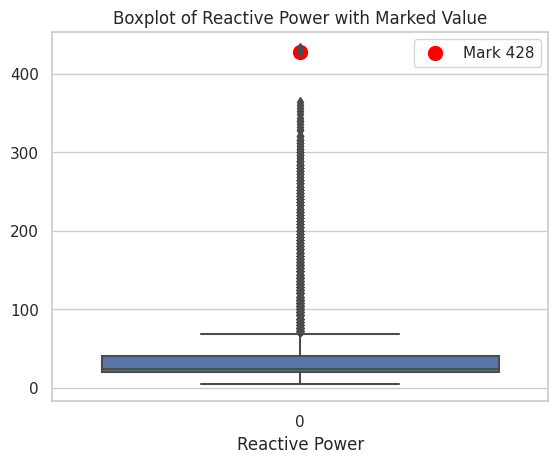

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming sorted_appliances is your DataFrame
# Assuming 'reactive power' is the column of interest

# Create a box plot
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances['reactive power'])

# Mark the specific value (e.g., 428) with a point
value_to_mark = 428
plt.scatter(x=[0], y=[value_to_mark], color='red', marker='o', s=100, label=f'Mark {value_to_mark}')

# Set labels and title
ax.set_title('Boxplot of Reactive Power with Marked Value')
ax.set_xlabel('Reactive Power')
ax.set_ylabel('Value')  # Add this line with your desired y-axis label

# Show the plot
plt.legend()
plt.show()


In [ ]:
df = df.dropna()


In [ ]:
df

reactive power  active power  apparent power  \
date                                                                
2016-01-11 17:00:00              24            66       70.228199   
2016-01-11 17:10:00              24            66       70.228199   
2016-01-11 17:20:00              20            60       63.245553   
2016-01-11 17:30:00              20            70       72.801099   
2016-01-11 17:40:00              24            76       79.699435   
...                             ...           ...             ...   
2016-05-27 17:20:00              40            60       72.111026   
2016-05-27 17:30:00              36            54       64.899923   
2016-05-27 17:40:00             108           172      203.096036   
2016-05-27 17:50:00             168           262      311.236245   
2016-05-27 18:00:00             172           268      318.446228   

                     power factor         t1       rh_1         t2       rh_2  \
date                                                                            
2016-01-11 17:00:00      0.939793  19.890000  47.596667  19.200000  44.790000   
2016-01-11 17:10:00      0.939793  19.890000  46.693333  19.200000  44.722500   
2016-01-11 17:20:00      0.948683  19.890000  46.300000  19.200000  44.626667   
2016-01-11 17:30:00      0.961524  19.890000  46.066667  19.200000  44.590000   
2016-01-11 17:40:00      0.953583  19.890000  46.333333  19.200000  44.530000   
...                           ...        ...        ...        ...        ...   
2016-05-27 17:20:00      0.832050  25.566667  46.560000  25.890000  42.025714   
2016-05-27 17:30:00      0.832050  25.500000  46.500000  25.754000  42.080000   
2016-05-27 17:40:00      0.846890  25.500000  46.596667  25.628571  42.768571   
2016-05-27 17:50:00      0.841804  25.500000  46.990000  25.414000  43.036000   
2016-05-27 18:00:00      0.841586  25.500000  46.600000  25.264286  42.971429   

                            t3       rh_3  ...         t9     rh_9      t_out  \
date                                       ...                                  
2016-01-11 17:00:00  19.790000  44.730000  ...  17.033333  45.5300   6.600000   
2016-01-11 17:10:00  19.790000  44.790000  ...  17.066667  45.5600   6.483333   
2016-01-11 17:20:00  19.790000  44.933333  ...  17.000000  45.5000   6.366667   
2016-01-11 17:30:00  19.790000  45.000000  ...  17.000000  45.4000   6.250000   
2016-01-11 17:40:00  19.790000  45.000000  ...  17.000000  45.4000   6.133333   
...                        ...        ...  ...        ...      ...        ...   
2016-05-27 17:20:00  27.200000  41.163333  ...  23.200000  46.7900  22.733333   
2016-05-27 17:30:00  27.133333  41.223333  ...  23.200000  46.7900  22.600000   
2016-05-27 17:40:00  27.050000  41.690000  ...  23.200000  46.7900  22.466667   
2016-05-27 17:50:00  26.890000  41.290000  ...  23.200000  46.8175  22.333333   
2016-05-27 18:00:00  26.823333  41.156667  ...  23.200000  46.8450  22.200000   

                     press_mm_hg     rh_out  windspeed  visibility  tdewpoint  \
date                                                                            
2016-01-11 17:00:00        733.5  92.000000   7.000000   63.000000   5.300000   
2016-01-11 17:10:00        733.6  92.000000   6.666667   59.166667   5.200000   
2016-01-11 17:20:00        733.7  92.000000   6.333333   55.333333   5.100000   
2016-01-11 17:30:00        733.8  92.000000   6.000000   51.500000   5.000000   
2016-01-11 17:40:00        733.9  92.000000   5.666667   47.666667   4.900000   
...                          ...        ...        ...         ...        ...   
2016-05-27 17:20:00        755.2  55.666667   3.333333   23.666667  13.333333   
2016-05-27 17:30:00        755.2  56.000000   3.500000   24.500000  13.300000   
2016-05-27 17:40:00        755.2  56.333333   3.666667   25.333333  13.266667   
2016-05-27 17:50:00        755.2  56.666667   3.833333   26.166667  13.233333   
2016-05-27 18:00:00        755.2  57.000000

In [ ]:
sorted_appliances = df.sort_values('active power', ascending=False)
sorted_appliances.head()

reactive power  active power  apparent power  \
date                                                                
2016-01-16 18:50:00             432           678      803.932833   
2016-01-21 18:50:00             428           672      796.723289   
2016-01-21 19:00:00             356           554      658.522589   
2016-01-14 17:00:00             364           546      656.210332   
2016-04-04 15:40:00             360           540      648.999230   

                     power factor         t1       rh_1         t2       rh_2  \
date                                                                            
2016-01-16 18:50:00      0.843354  21.930000  42.766667  21.040000  38.080000   
2016-01-21 18:50:00      0.843455  19.600000  34.300000  18.426667  33.963333   
2016-01-21 19:00:00      0.841277  19.730000  37.863333  18.566667  34.090000   
2016-01-14 17:00:00      0.832050  21.463333  41.693333  20.856667  38.363333   
2016-04-04 15:40:00      0.832050  23.000000  43.166667  22.200000  40.426667   

                            t3       rh_3  ...     t9       rh_9      t_out  \
date                                       ...                                
2016-01-16 18:50:00  20.700000  40.633333  ...  17.79  40.672500   2.083333   
2016-01-21 18:50:00  18.390000  36.930000  ...  16.00  36.930000  -0.616667   
2016-01-21 19:00:00  18.390000  36.863333  ...  16.00  36.730000  -0.800000   
2016-01-14 17:00:00  21.666667  43.930000  ...  17.00  43.466667   4.600000   
2016-04-04 15:40:00  26.100000  38.930000  ...  20.70  43.333333  14.766667   

                     press_mm_hg     rh_out  windspeed  visibility  tdewpoint  \
date                                                                            
2016-01-16 18:50:00   765.033333  85.500000   3.666667   40.000000  -0.083333   
2016-01-21 18:50:00   764.533333  82.833333   1.000000   64.166667  -3.216667   
2016-01-21 19:00:00   764.500000  84.000000   1.000000   64.000000  -3.200000   
2016-01-14 17:00:00   747.900000  76.000000   7.000000   40.000000   0.700000   
2016-04-04 15:40:00   749.266667  59.666667   7.000000   40.000000   7.000000   

                           rv1        rv2  
date                                       
2016-01-16 18:50:00  27.408521  27.408521  
2016-01-21 18:50:00  11.735734  11.735734  
2016-01-21 19:00:00   3.221583   3.221583  
2016-01-14 17:00:00  18.937972  18.937972  
2016-04-04 15:40:00  15.105153  15.105153  

[5 rows x 30 columns]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['month'] = df.index.month

In [ ]:
df

reactive power  active power  apparent power  \
date                                                                
2016-01-11 17:00:00              24            66       70.228199   
2016-01-11 17:10:00              24            66       70.228199   
2016-01-11 17:20:00              20            60       63.245553   
2016-01-11 17:30:00              20            70       72.801099   
2016-01-11 17:40:00              24            76       79.699435   
...                             ...           ...             ...   
2016-05-27 17:20:00              40            60       72.111026   
2016-05-27 17:30:00              36            54       64.899923   
2016-05-27 17:40:00             108           172      203.096036   
2016-05-27 17:50:00             168           262      311.236245   
2016-05-27 18:00:00             172           268      318.446228   

                     power factor         t1       rh_1         t2       rh_2  \
date                                                                            
2016-01-11 17:00:00      0.939793  19.890000  47.596667  19.200000  44.790000   
2016-01-11 17:10:00      0.939793  19.890000  46.693333  19.200000  44.722500   
2016-01-11 17:20:00      0.948683  19.890000  46.300000  19.200000  44.626667   
2016-01-11 17:30:00      0.961524  19.890000  46.066667  19.200000  44.590000   
2016-01-11 17:40:00      0.953583  19.890000  46.333333  19.200000  44.530000   
...                           ...        ...        ...        ...        ...   
2016-05-27 17:20:00      0.832050  25.566667  46.560000  25.890000  42.025714   
2016-05-27 17:30:00      0.832050  25.500000  46.500000  25.754000  42.080000   
2016-05-27 17:40:00      0.846890  25.500000  46.596667  25.628571  42.768571   
2016-05-27 17:50:00      0.841804  25.500000  46.990000  25.414000  43.036000   
2016-05-27 18:00:00      0.841586  25.500000  46.600000  25.264286  42.971429   

                            t3       rh_3  ...     rh_out  windspeed  \
date                                       ...                         
2016-01-11 17:00:00  19.790000  44.730000  ...  92.000000   7.000000   
2016-01-11 17:10:00  19.790000  44.790000  ...  92.000000   6.666667   
2016-01-11 17:20:00  19.790000  44.933333  ...  92.000000   6.333333   
2016-01-11 17:30:00  19.790000  45.000000  ...  92.000000   6.000000   
2016-01-11 17:40:00  19.790000  45.000000  ...  92.000000   5.666667   
...                        ...        ...  ...        ...        ...   
2016-05-27 17:20:00  27.200000  41.163333  ...  55.666667   3.333333   
2016-05-27 17:30:00  27.133333  41.223333  ...  56.000000   3.500000   
2016-05-27 17:40:00  27.050000  41.690000  ...  56.333333   3.666667   
2016-05-27 17:50:00  26.890000  41.290000  ...  56.666667   3.833333   
2016-05-27 18:00:00  26.823333  41.156667  ...  57.000000   4.000000   

                     visibility  tdewpoint        rv1        rv2  hour  week  \
date                                                                           
2016-01-11 17:00:00   63.000000   5.300000  13.275433  13.275433    17     2   
2016-01-11 17:10:00   59.166667   5.200000  18.606195  18.606195    17     2   
2016-01-11 17:20:00   55.333333   5.100000  28.642668  28.642668    17     2   
2016-01-11 17:30:00   51.500000   5.000000  45.410389  45.410389    17     2   
2016-01-11 17:40:00   47.666667   4.900000  10.084097  10.084097    17     2   
...                         ...        ...        ...        ...   ...   ...   
2016-05-27 17:20:00   23.666667  13.333333  43.096812  43.096812    17    21   
2016-05-27 17:30:00   24.500000  13.300000  49.282940  49.282940    17    21   
2016-05-27 17:40:00   25.333333  13.266667  29.199117  29.199117    17    21   
2016-05-27 17:50:00   26.166667  13.233333   6.322784   6.322784    17    21   
2016-05-27 18:00:00   27.000000  13.200000  34.118851  34.118851    18    21   

                     weekday  month  
date                                 
2016-01-11 17:0

In [ ]:
df['log_active_power'] = np.log(df['active power'])
df['log_reactive_power'] = np.log(df['reactive power'])
df['log_power_factor'] = np.log(df['power factor'])


In [ ]:
list(df.columns)

['reactive power',
 'active power',
 'apparent power',
 'power factor',
 't1',
 'rh_1',
 't2',
 'rh_2',
 't3',
 'rh_3',
 't4',
 'rh_4',
 't5',
 'rh_5',
 't6',
 'rh_6',
 't7',
 'rh_7',
 't8',
 'rh_8',
 't9',
 'rh_9',
 't_out',
 'press_mm_hg',
 'rh_out',
 'windspeed',
 'visibility',
 'tdewpoint',
 'rv1',
 'rv2',
 'hour',
 'week',
 'weekday',
 'month',
 'log_active_power',
 'log_reactive_power',
 'log_power_factor']

In [ ]:
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday',
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

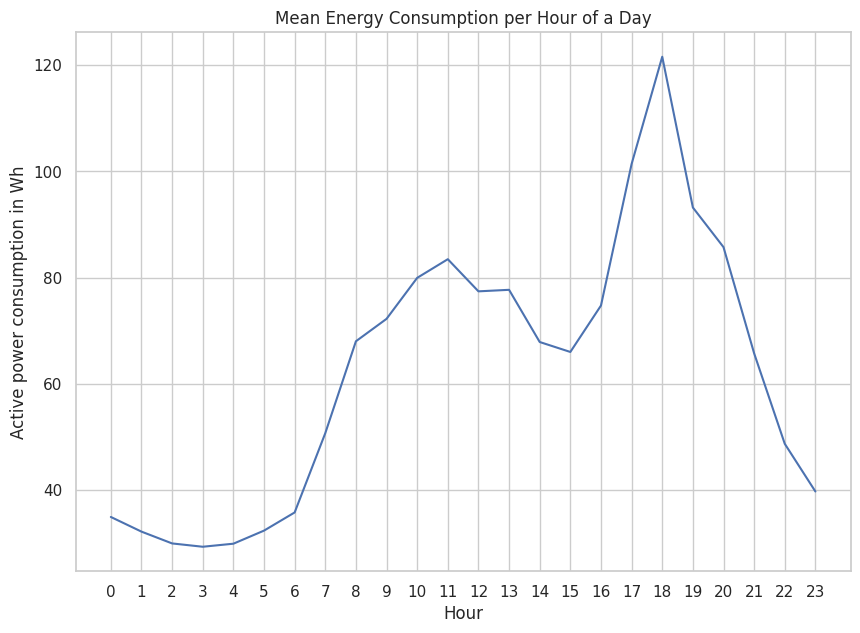

In [ ]:
#plotting the hourly consumption

hourly('active power').plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Active power consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

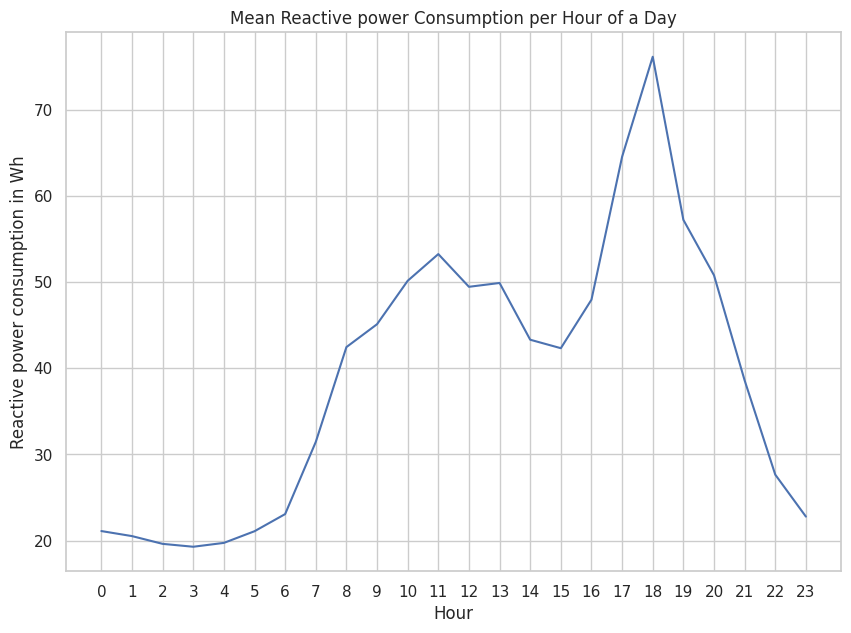

In [ ]:
#plotting the hourly consumption

hourly('reactive power').plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Reactive power consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Reactive power Consumption per Hour of a Day')

plt.xticks(ticks);

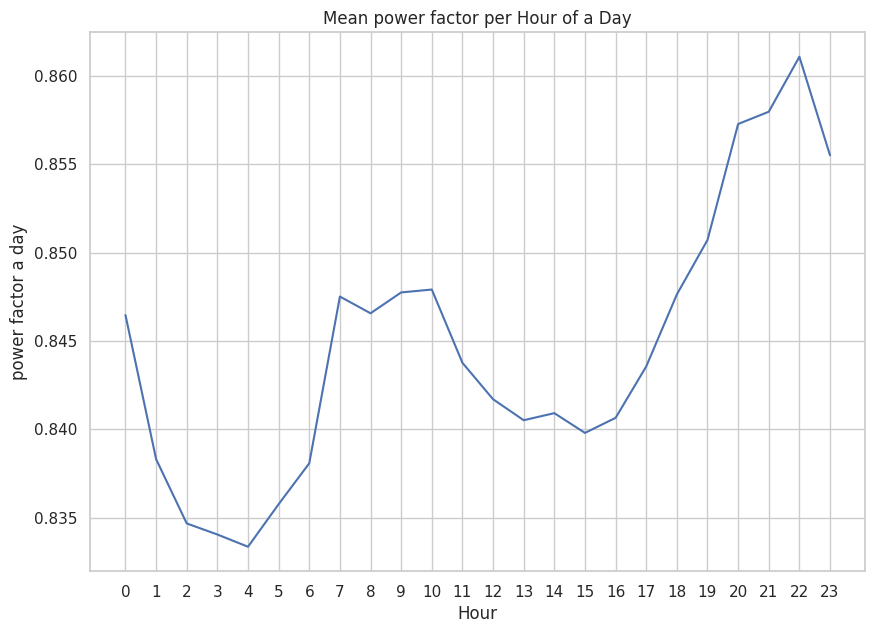

In [ ]:
#plotting the hourly consumption

hourly('power factor').plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('power factor a day')
ticks = list(range(0, 24, 1))
plt.title('Mean power factor per Hour of a Day')

plt.xticks(ticks);

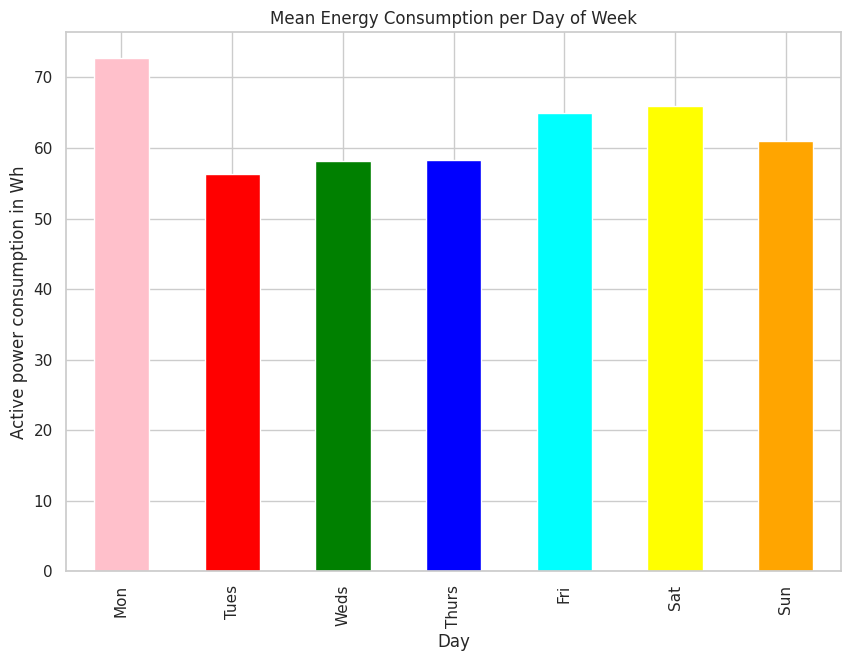

In [ ]:
#Weekly Consumption

daily('active power').plot(kind = 'bar', color=['pink', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange'], figsize=(10,7))
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Active power consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

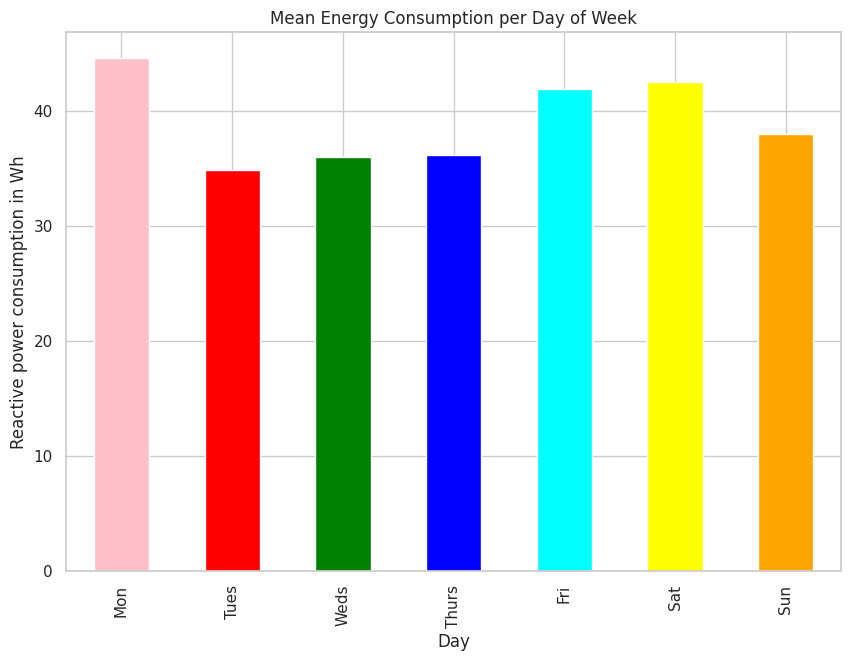

In [ ]:
#Weekly Consumption

daily('reactive power').plot(kind = 'bar', color=['pink', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange'], figsize=(10,7))
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Reactive power consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

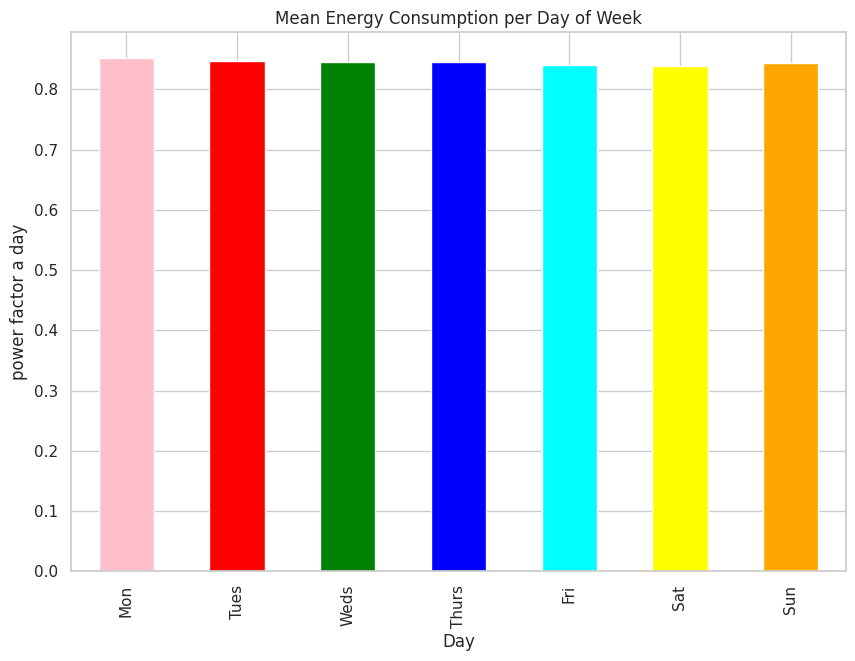

In [ ]:
#Weekly Consumption

daily('power factor').plot(kind = 'bar', color=['pink', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange'], figsize=(10,7))
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('power factor a day')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

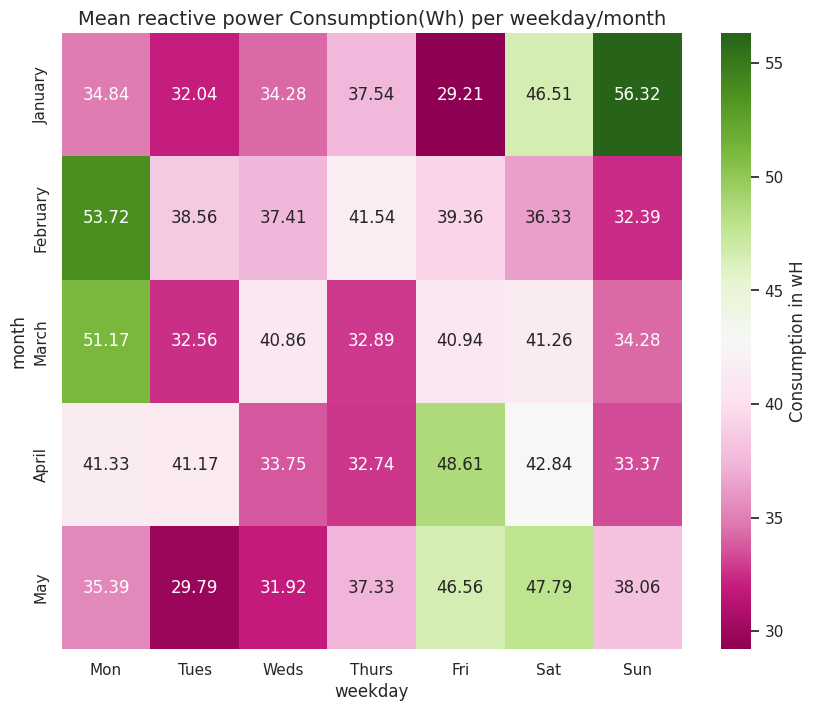

In [ ]:
#MOntly Consumption
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('reactive power').T,cmap="PiYG",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean reactive power Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

Text(0.5, 0, 'Reactive power Log(wH)')

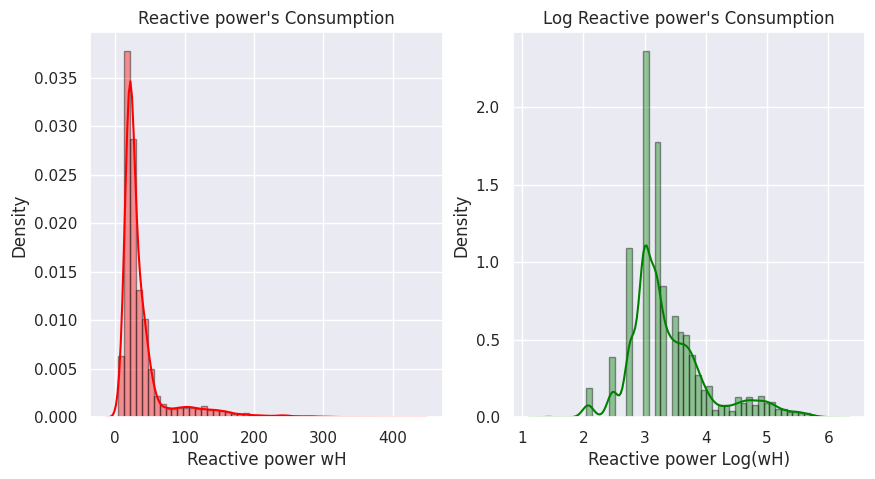

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(10,5))

sns.distplot(df['reactive power'], hist=True, color = 'red',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Reactive power's Consumption")
axes[0].set_xlabel('Reactive power wH')

sns.distplot(df['log_reactive_power'], hist=True, color = 'green',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Reactive power's Consumption")
axes[1].set_xlabel('Reactive power Log(wH)')

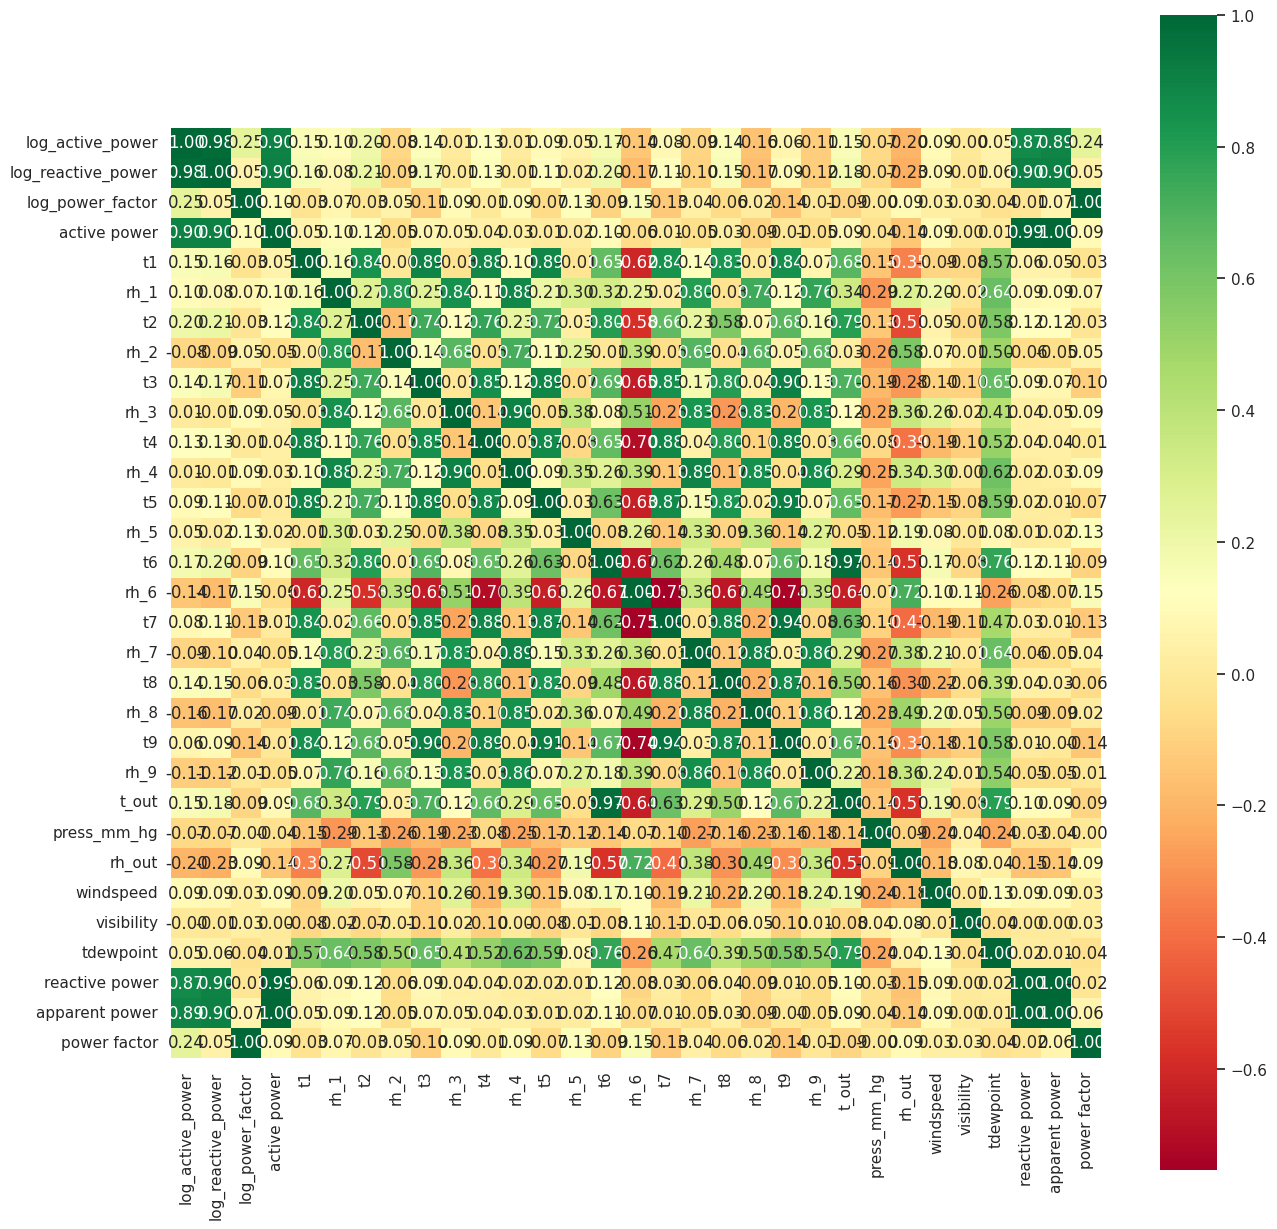

In [ ]:
col = ['log_active_power','log_reactive_power','log_power_factor' ,'active power', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint','reactive power','apparent power','power factor']
corr = df[col].corr()
plt.figure(figsize = (15,15))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square = True, cmap='RdYlGn', fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

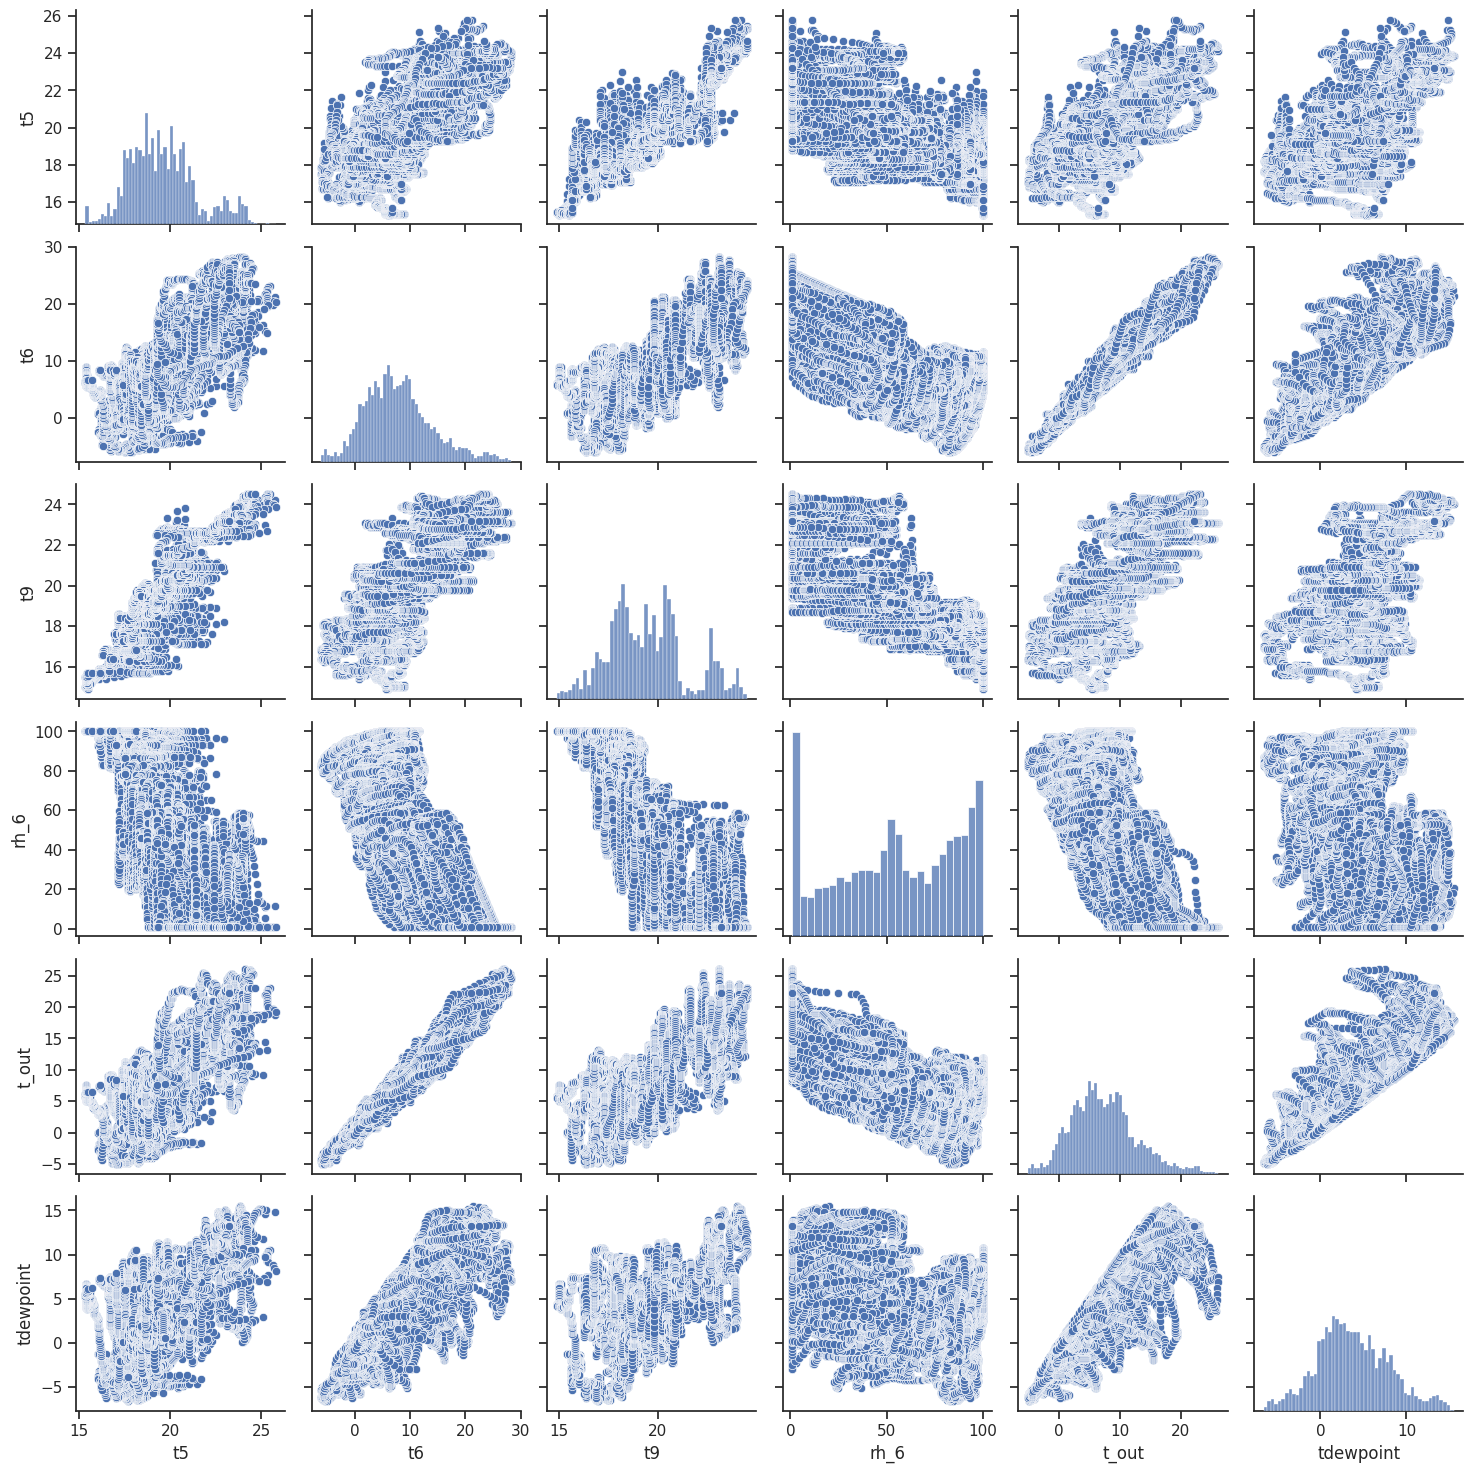

In [ ]:
## lets check the linear independance of above highly correlated varaibles
col = ['t5','t6','t9', 'rh_6','t_out','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show();

In [ ]:
list(df.columns)


['reactive power',
 'active power',
 'apparent power',
 'power factor',
 't1',
 'rh_1',
 't2',
 'rh_2',
 't3',
 'rh_3',
 't4',
 'rh_4',
 't5',
 'rh_5',
 't6',
 'rh_6',
 't7',
 'rh_7',
 't8',
 'rh_8',
 't9',
 'rh_9',
 't_out',
 'press_mm_hg',
 'rh_out',
 'windspeed',
 'visibility',
 'tdewpoint',
 'rv1',
 'rv2',
 'hour',
 'week',
 'weekday',
 'month',
 'log_active_power',
 'log_reactive_power',
 'log_power_factor']

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'reactive power' is the column name
top_10_repeated_values = df['reactive power'].value_counts().head(10)

print("Top 10 Most Repeated Values in Reactive Power:")
print(top_10_repeated_values)


Top 10 Most Repeated Values in Reactive Power:
20    4368
24    3282
16    2019
28    1560
32    1205
36    1015
40     978
44     736
12     723
48     502
Name: reactive power, dtype: int64


In [ ]:

Y1 = df['log_active_power']
Y2 = df['log_reactive_power']
#Y3 = df['log_power_factor']

In [ ]:
# Due to conlusion made above below columns are removed
X =df.drop(df.loc[:,['rv1','rv2','visibility','t6','t9','active power','reactive power', 'apparent power','power factor','log_active_power',
 'log_reactive_power',
 'log_power_factor','hour','week','weekday','month']],axis=1)

In [ ]:
X.head()

t1       rh_1    t2       rh_2     t3       rh_3  \
date                                                                       
2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

                            t4       rh_4         t5   rh_5  ...         t7  \
date                                                         ...              
2016-01-11 17:00:00  19.000000  45.566667  17.166667  55.20  ...  17.200000   
2016-01-11 17:10:00  19.000000  45.992500  17.166667  55.20  ...  17.200000   
2016-01-11 17:20:00  18.926667  45.890000  17.166667  55.09  ...  17.200000   
2016-01-11 17:30:00  18.890000  45.723333  17.166667  55.09  ...  17.133333   
2016-01-11 17:40:00  18.890000  45.530000  17.200000  55.09  ...  17.200000   

                          rh_7    t8       rh_8   rh_9     t_out  press_mm_hg  \
date                                                                            
2016-01-11 17:00:00  41.626667  18.2  48.900000  45.53  6.600000        733.5   
2016-01-11 17:10:00  41.560000  18.2  48.863333  45.56  6.483333        733.6   
2016-01-11 17:20:00  41.433333  18.2  48.730000  45.50  6.366667        733.7   
2016-01-11 17:30:00  41.290000  18.1  48.590000  45.40  6.250000        733.8   
2016-01-11 17:40:00  41.230000  18.1  48.590000  45.40  6.133333        733.9   

                     rh_out  windspeed  tdewpoint  
date                                               
2016-01-11 17:00:00    92.0   7.000000        5.3  
2016-01-11 17:10:00    92.0   6.666667        5.2  
2016-01-11 17:20:00    92.0   6.333333        5.1  
2016-01-11 17:30:00    92.0   6.000000        5.0  
2016-01-11 17:40:00    92.0   5.666667        4.9  

[5 rows x 21 columns]

In [ ]:
print(Y1.count())
print(Y2.count())
#print(Y3.count())

19735
19735


In [ ]:
X.count()

t1             19735
rh_1           19735
t2             19735
rh_2           19735
t3             19735
rh_3           19735
t4             19735
rh_4           19735
t5             19735
rh_5           19735
rh_6           19735
t7             19735
rh_7           19735
t8             19735
rh_8           19735
rh_9           19735
t_out          19735
press_mm_hg    19735
rh_out         19735
windspeed      19735
tdewpoint      19735
dtype: int64

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.2, random_state = 42)
x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.2, random_state = 42)
#x3_train, x3_test, y3_train, y3_test = train_test_split(X, Y3, test_size=0.2, random_state = 42)

In [ ]:
x2_train.describe()

t1          rh_1            t2          rh_2            t3  \
count  15788.000000  15788.000000  15788.000000  15788.000000  15788.000000   
mean      21.688684     40.266486     20.345215     40.428811     22.269113   
std        1.609561      3.957219      2.196357      4.067871      2.007629   
min       16.790000     27.023333     16.100000     20.463333     17.200000   
25%       20.775937     37.399167     18.823333     37.900000     20.790000   
50%       21.600000     39.663333     20.000000     40.500000     22.100000   
75%       22.600000     43.060000     21.500000     43.290000     23.290000   
max       26.260000     57.423333     29.856667     54.766667     29.236000   

               rh_3            t4          rh_4            t5          rh_5  \
count  15788.000000  15788.000000  15788.000000  15788.000000  15788.000000   
mean      39.248114     20.854106     39.047357     19.598492     50.948632   
std        3.245545      2.051129      4.329110      1.850812      9.001768   
min       28.766667     15.100000     27.660000     15.330000     30.166667   
25%       36.900000     19.533333     35.590000     18.290000     45.433333   
50%       38.560000     20.633333     38.463333     19.390000     49.078222   
75%       41.760000     22.100000     42.193333     20.632083     53.702500   
max       50.163333     26.200000     51.090000     25.795000     96.321667   

       ...            t7          rh_7            t8          rh_8  \
count  ...  15788.000000  15788.000000  15788.000000  15788.000000   
mean   ...     20.266936     35.410537     22.029474     42.964343   
std    ...      2.116903      5.109426      1.959194      5.219066   
min    ...     15.390000     23.230000     16.306667     29.600000   
25%    ...     18.700000     31.500000     20.790000     39.090000   
50%    ...     20.060000     34.900000     22.100000     42.427857   
75%    ...     21.600000     39.016500     23.390000     46.561667   
max    ...     25.963333     51.327778     27.230000     58.780000   

               rh_9         t_out   press_mm_hg        rh_out     windspeed  \
count  15788.000000  15788.000000  15788.000000  15788.000000  15788.000000   
mean      41.570982      7.418384    755.532075     79.822742      4.030780   
std        4.156227      5.327514      7.373040     14.895451      2.436011   
min       29.166667     -5.000000    729.300000     24.000000      0.000000   
25%       38.530000      3.633333    750.916667     70.333333      2.000000   
50%       40.933333      6.933333    756.100000     84.000000      3.666667   
75%       44.363333     10.416667    760.937500     91.666667      5.500000   
max       53.326667     26.100000    772.300000    100.000000     14.000000   

          tdewpoint  
count  15788.000000  
mean       3.781387  
std        4.202189  
min       -6.600000  
25%        0.933333  
50%        3.433333  
75%        6.600000  
max       15.400000  

[8 rows x 21 columns]

In [ ]:
y2_train.describe()

count    15788.000000
mean         3.388986
std          0.656777
min          1.386294
25%          2.995732
50%          3.178054
75%          3.688879
max          6.068426
Name: log_reactive_power, dtype: float64

In [ ]:
print(len(x1_train),len(x1_test),len(y1_train),len(y1_test))
print(len(x2_train),len(x2_test),len(y2_train),len(y2_test))
#print(len(x3_train),len(x3_test),len(y3_train),len(y3_test))

15788 3947 15788 3947
15788 3947 15788 3947


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x1_train)
x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)
scaler.fit(x2_train)
x2_train = scaler.transform(x2_train)
x2_test = scaler.transform(x2_test)
#scaler.fit(x3_train)
#x3_train = scaler.transform(x3_train)
#x3_test = scaler.transform(x3_test)

In [ ]:
from sklearn import linear_model

lin_model1 = linear_model.LinearRegression()
lin_model1.fit( x1_train, y1_train)
lin_model2 = linear_model.LinearRegression()
lin_model2.fit( x2_train, y2_train)
#lin_model3 = linear_model.LinearRegression()
#lin_model3.fit( x3_train, y3_train)

LinearRegression()

In [ ]:
from sklearn import svm

svr_model1 = svm.SVR(gamma ='scale')
svr_model1.fit(x1_train , y1_train)
svr_model2 = svm.SVR(gamma ='scale')
svr_model2.fit(x2_train , y2_train)
#svr_model3 = svm.SVR(gamma ='scale')
#svr_model3.fit(x3_train , y3_train)



SVR()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
tree_model = DecisionTreeRegressor()

# Fit the model to your training data
tree_model.fit(x1_train, y1_train)

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fit the model to your training data
rf_model.fit(x2_train, y2_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    model_str = str(model)

    print(model_str, '\n')
    print('Average Error (Mean Absolute Error)   : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2                    : {:0.2f}%'.format(r_score))
    print('Accuracy                              : {:0.2f}%\n'.format(accuracy))

In [ ]:
evaluate(rf_model, x2_test, y2_test)


RandomForestRegressor(random_state=42) 

Average Error (Mean Absolute Error)   : 0.2235 degrees
Variance score R^2                    : 72.82%
Accuracy                              : 93.44%



In [ ]:
evaluate(lin_model2, x2_test, y2_test)
evaluate(svr_model1, x2_test, y2_test)
evaluate(tree_model, x2_test, y2_test)
evaluate(rf_model, x1_test, y1_test)

LinearRegression() 

Average Error (Mean Absolute Error)   : 0.4064 degrees
Variance score R^2                    : 23.04%
Accuracy                              : 88.07%

SVR() 

Average Error (Mean Absolute Error)   : 0.3040 degrees
Variance score R^2                    : 46.66%
Accuracy                              : 91.32%

DecisionTreeRegressor() 

Average Error (Mean Absolute Error)   : 0.2785 degrees
Variance score R^2                    : 49.92%
Accuracy                              : 91.84%

RandomForestRegressor(random_state=42) 

Average Error (Mean Absolute Error)   : 0.2231 degrees
Variance score R^2                    : 72.85%
Accuracy                              : 93.45%



In [ ]:
cv = TimeSeriesSplit(n_splits = 10)


print('Linear Model:')
scores = cross_val_score(lin_model2, x2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model2,x2_train , y2_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))



print('SVR Model:')
scores = cross_val_score(svr_model1, x2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model1, x2_train, y2_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


print('Desision Tree:')
scores = cross_val_score(tree_model, x2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(tree_model,x2_train , y2_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))



print('Random Forest:')
scores = cross_val_score(rf_model, x2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, x2_train, y2_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Model:
Accuracy: 99.59 (+/- 0.02) degrees
R^2: 0.22 (+/- 0.04) degrees
SVR Model:
Accuracy: 99.68 (+/- 0.04) degrees
R^2: 0.41 (+/- 0.11) degrees
Desision Tree:
Accuracy: 99.64 (+/- 0.12) degrees
R^2: 0.22 (+/- 0.39) degrees
Random Forest:
Accuracy: 99.72 (+/- 0.08) degrees
R^2: 0.59 (+/- 0.20) degrees


In [ ]:

print('Random Forest:')
scores = cross_val_score(rf_model, x2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, x2_train, y2_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Random Forest:
Accuracy: 99.72 (+/- 0.08) degrees
R^2: 0.61 (+/- 0.19) degrees


In [ ]:
y1_pred = lin_model2.predict( x2_test)
y2_pred = svr_model1.predict( x2_test)
y3_pred = tree_model.predict( x2_test)
y4_pred = rf_model.predict( x2_test)

In [ ]:
y4_pred = rf_model.predict( x2_test)

Text(0.5, 0.01, 'Fitted Values')

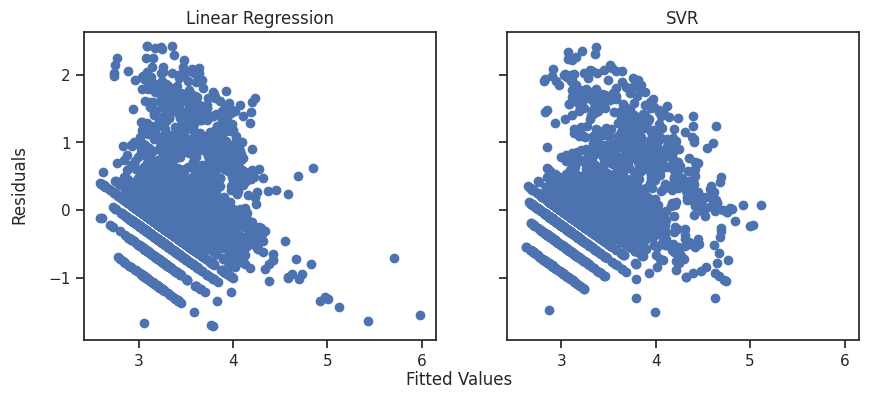

In [ ]:
fig, axes = plt.subplots(1,2 ,figsize=(10,4),  sharex=True, sharey=True)
axes[0].scatter(y1_pred, y2_test-y1_pred)
axes[0].set_title('Linear Regression')


axes[1].scatter(y2_pred, y2_test-y2_pred)
axes[1].set_title('SVR')



fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

At glance there is no any big difference in plots.our 2 models do not have constant standard deviation.They are scatterted.However, SVR shows smaller varaince in caomparison to Linear regression.

Text(0.5, 0.01, 'Fitted Values')

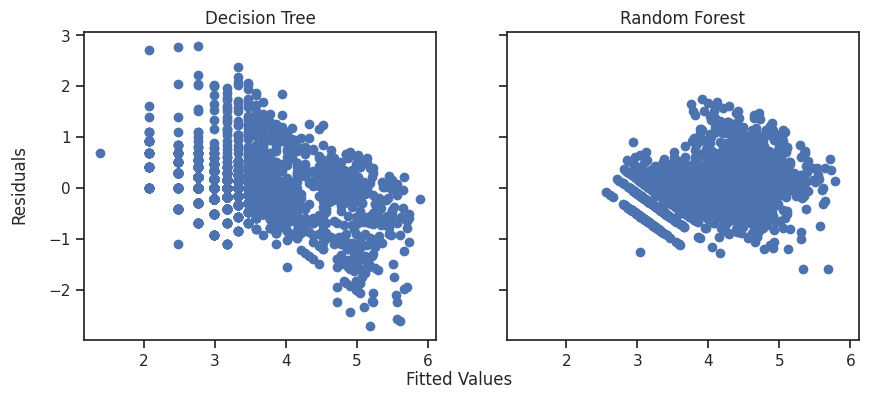

In [ ]:
fig, axes = plt.subplots(1,2 ,figsize=(10,4),  sharex=True, sharey=True)
axes[0].scatter(y3_pred, y2_test-y3_pred)
axes[0].set_title('Decision Tree')

axes[1].scatter(y4_pred, y2_test-y4_pred)
axes[1].set_title('Random Forest')



fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

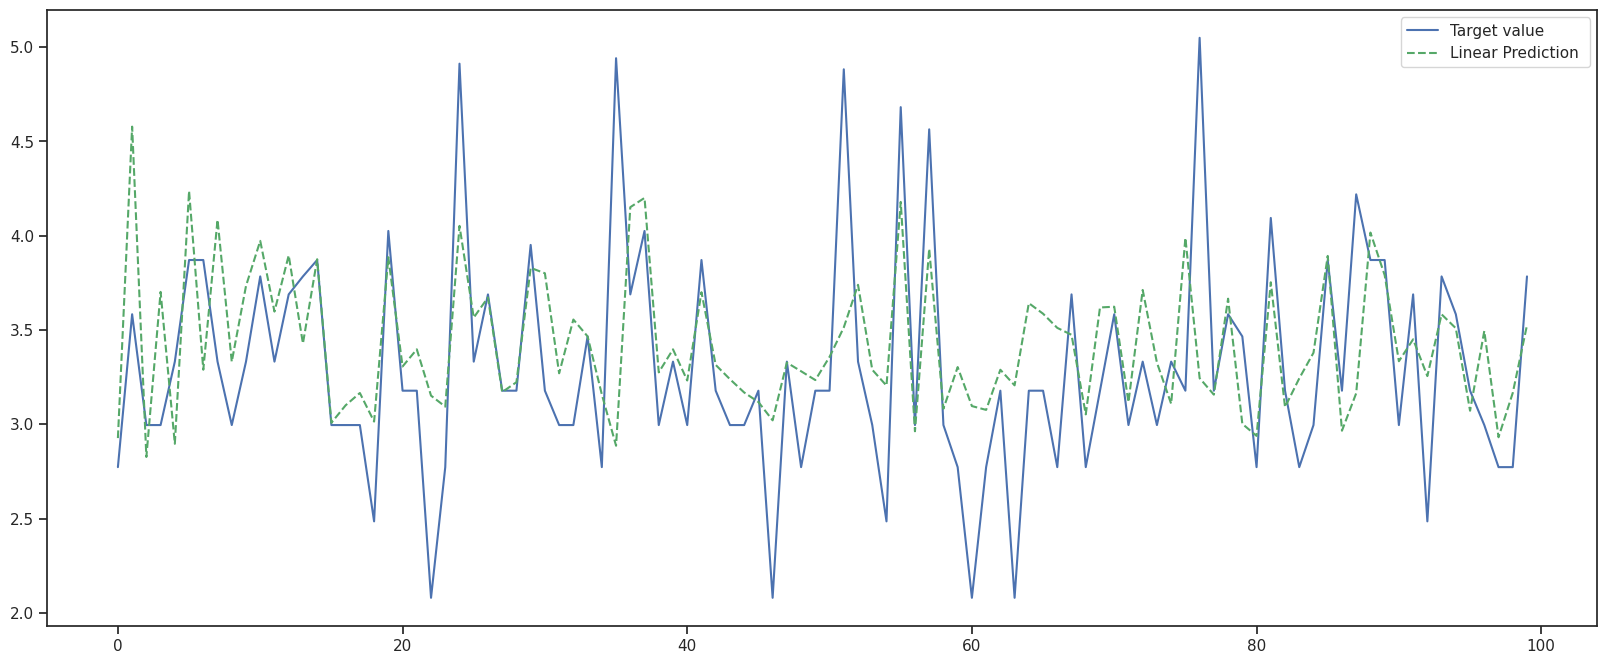

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y2_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Linear Prediction ', linestyle='--', color='g')
plt.legend(loc=1)

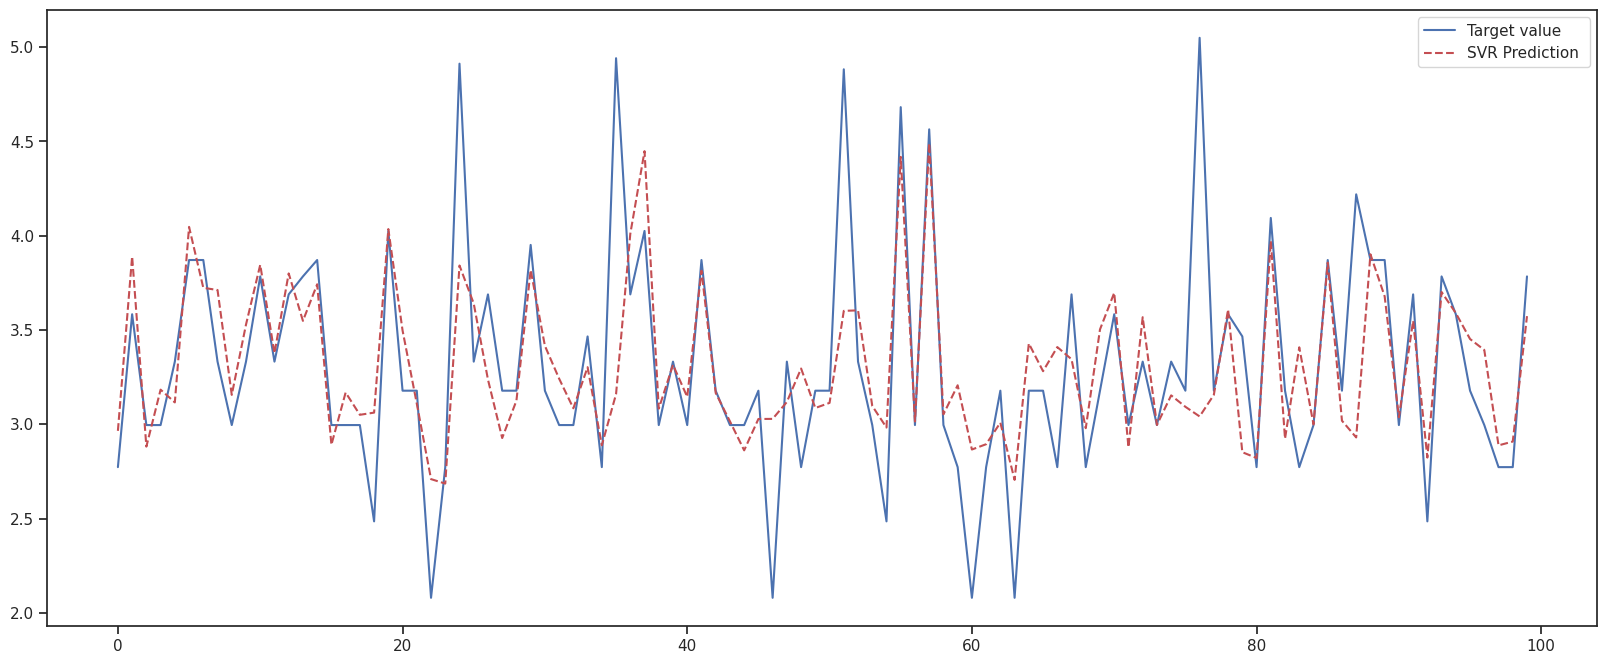

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y2_test[:100].values,label='Target value',color='b')
plt.plot(y2_pred[:100],label='SVR Prediction ', linestyle='--', color='r')
plt.legend(loc=1)

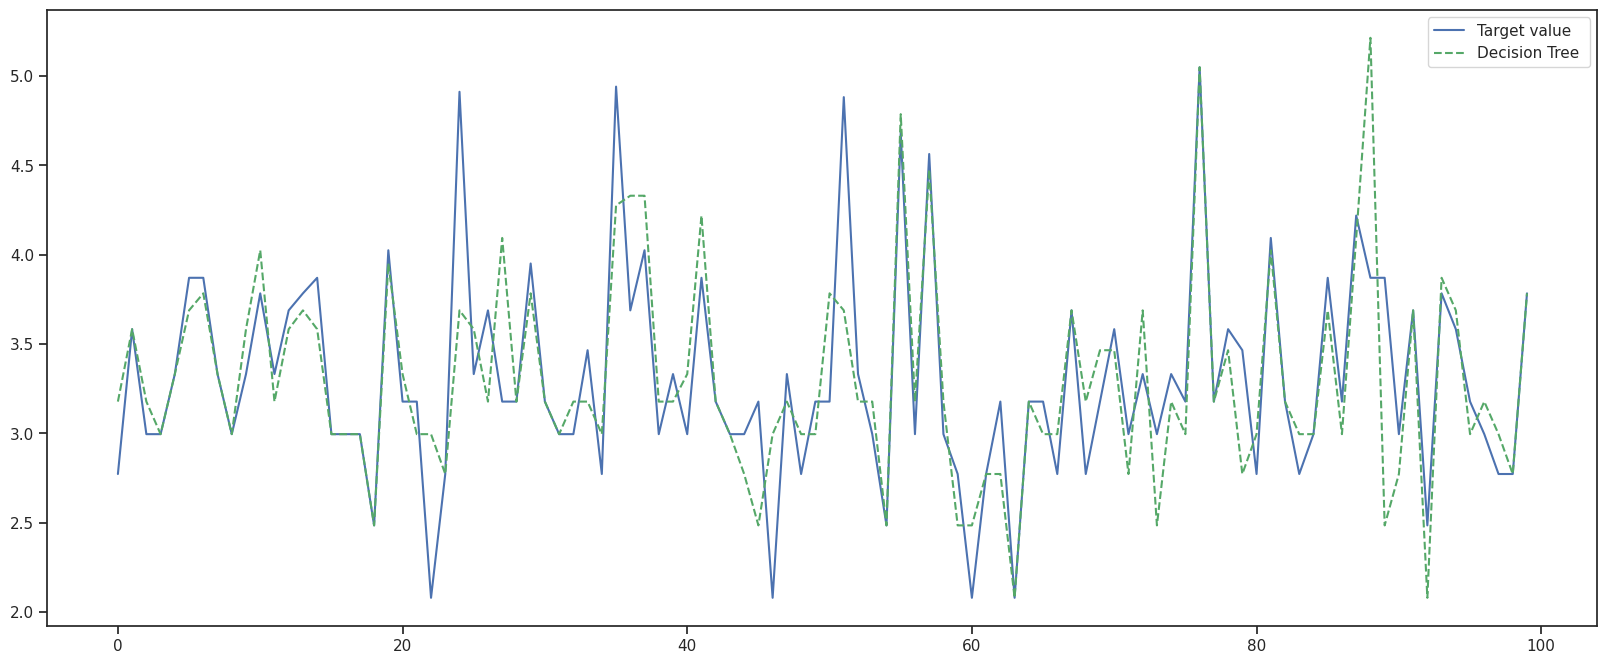

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y2_test[:100].values,label='Target value',color='b')
plt.plot(y3_pred[:100],label='Decision Tree ', linestyle='--', color='g')

plt.legend(loc=1)

In [ ]:
print(y2_test)

date
2016-03-14 01:40:00    2.772589
2016-01-30 20:00:00    3.583519
2016-03-15 03:00:00    2.995732
2016-04-20 10:10:00    2.995732
2016-03-13 08:10:00    3.332205
                         ...   
2016-03-19 20:50:00    3.465736
2016-03-20 15:10:00    3.688879
2016-04-18 13:00:00    3.178054
2016-05-11 05:40:00    3.332205
2016-05-12 13:30:00    2.995732
Name: log_reactive_power, Length: 3947, dtype: float64


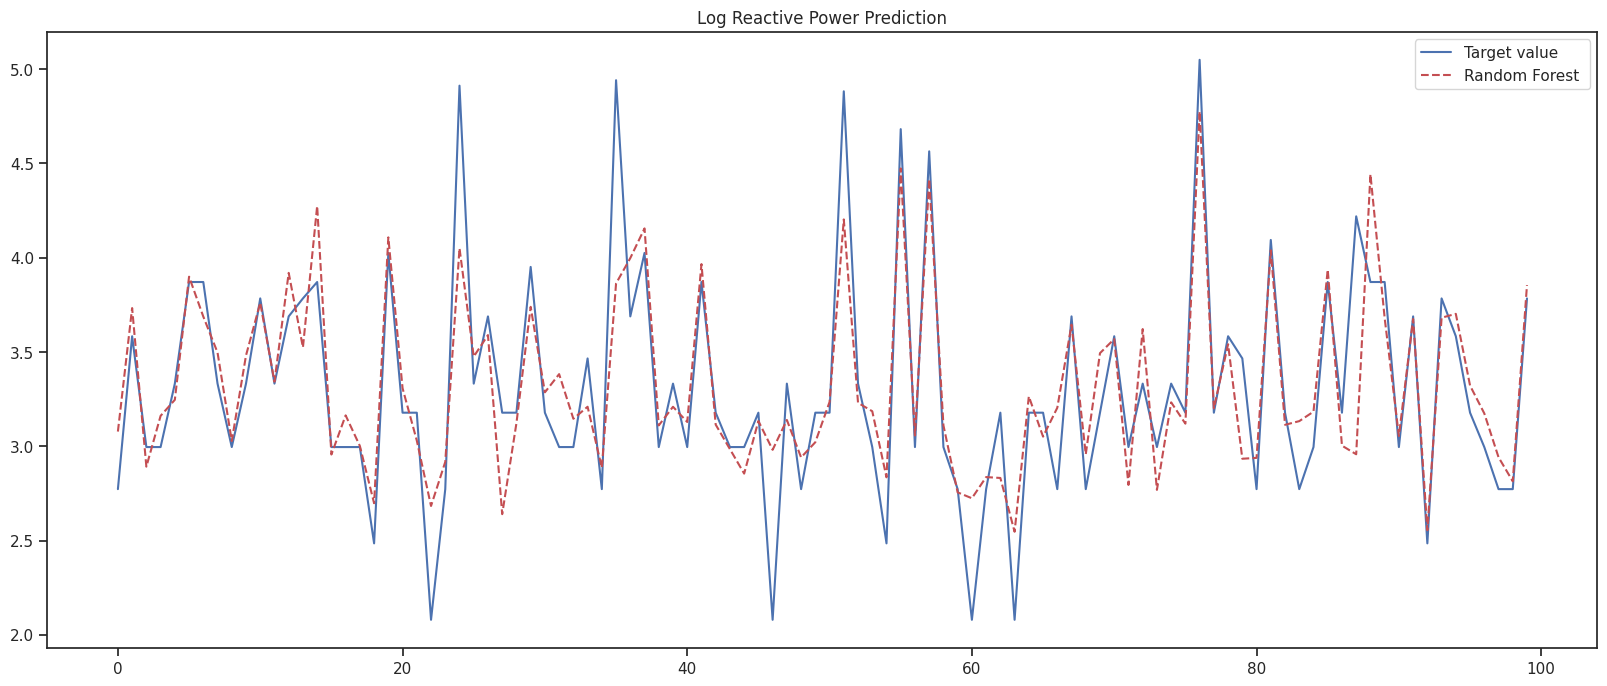

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y1_test[:100].values,label='Target value',color='b')
plt.plot(y4_pred[:100],label='Random Forest ', linestyle='--', color='r')
plt.title('Log Reactive Power Prediction')
plt.legend(loc=1)

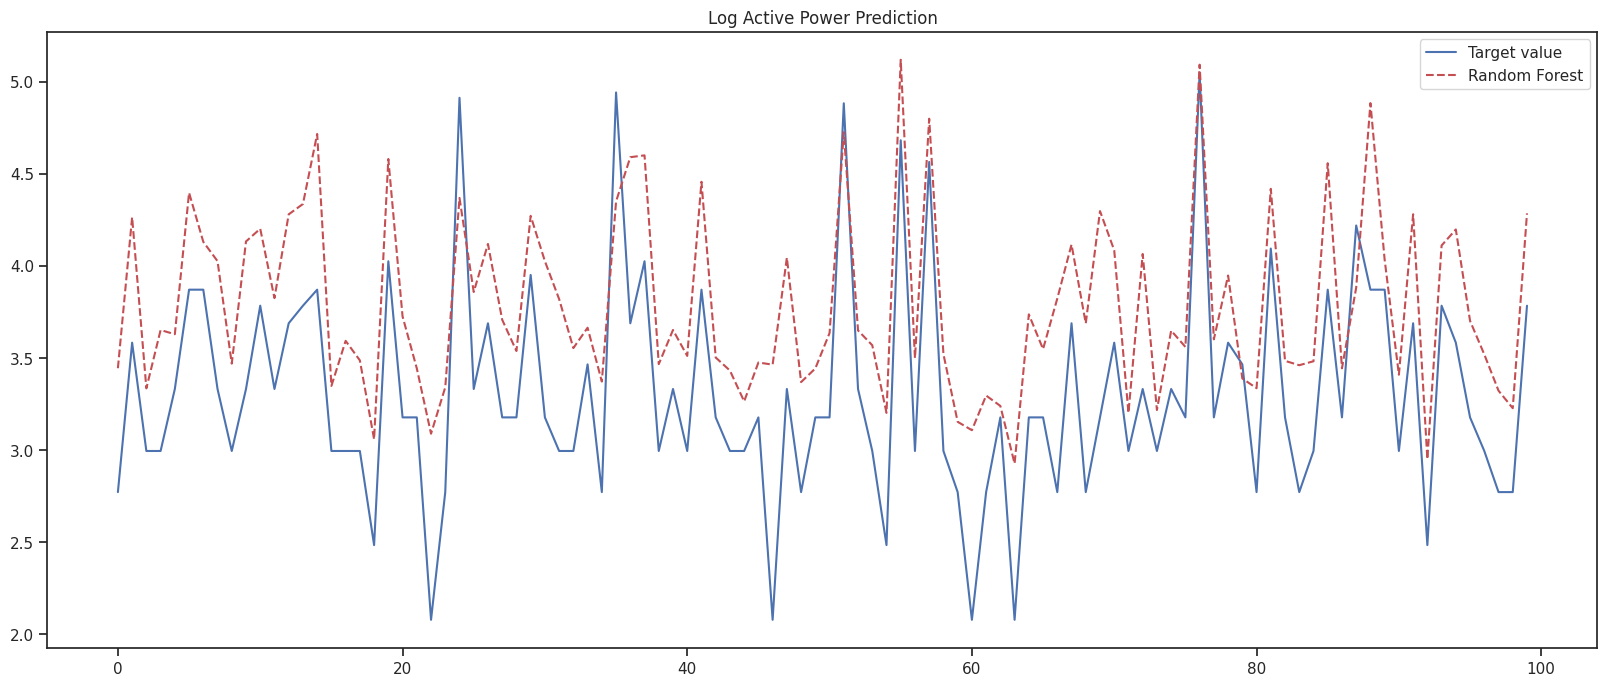

In [ ]:
gap_value = 0  # You can adjust this value to set the desired gap

fig = plt.figure(figsize=(20, 8))
plt.plot(y2_test[:100].values, label='Target value', color='b')
plt.plot(y4_pred[:100] + gap_value, label='Random Forest', linestyle='--', color='r')
plt.title('Log Active Power Prediction')
plt.legend(loc=1)


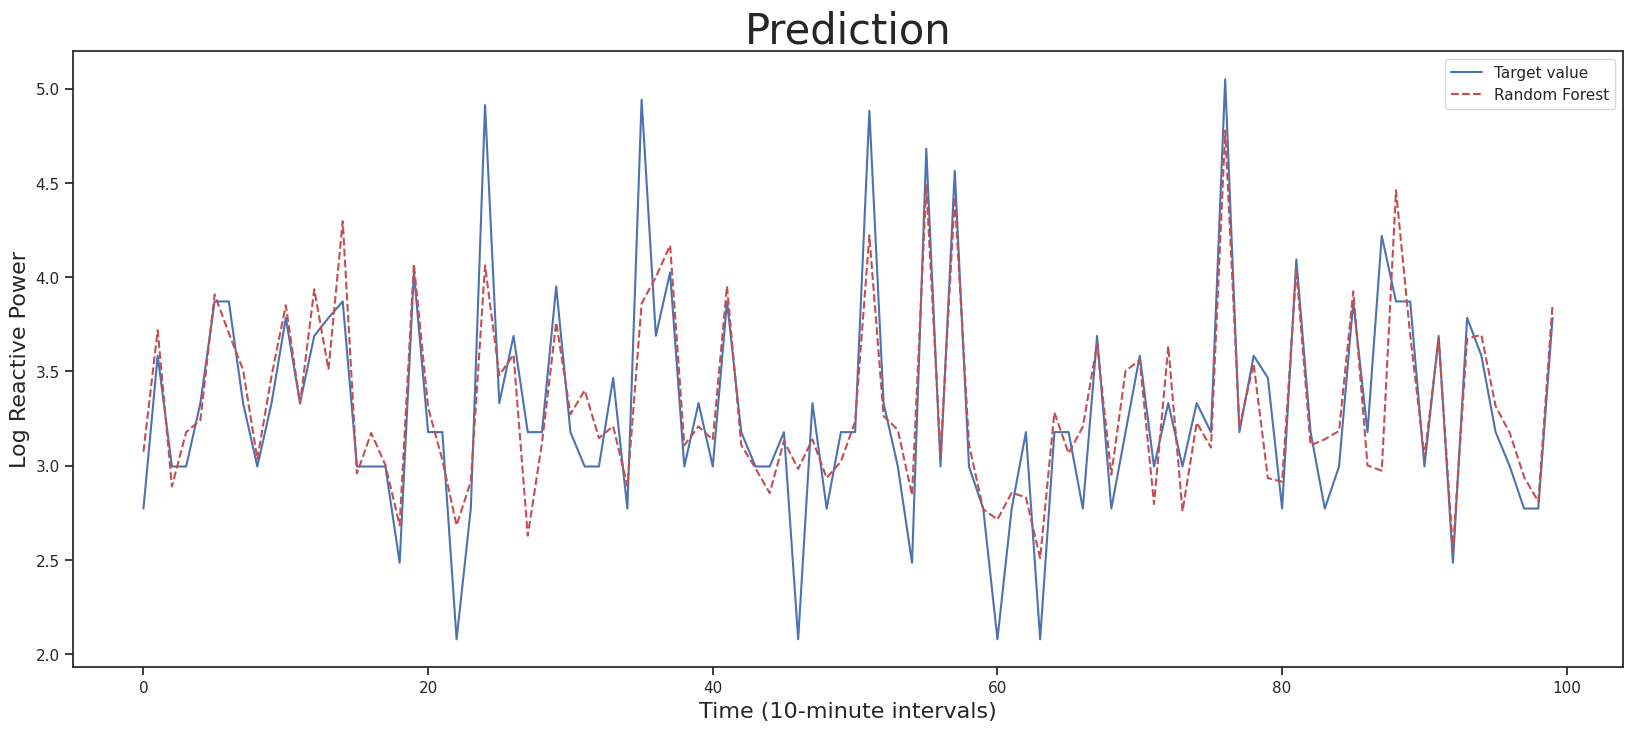

In [ ]:
import matplotlib.pyplot as plt

# Assuming y2_test is the target values and y4_pred is the predictions
# gap_value is added to align the predicted values

fig = plt.figure(figsize=(20, 8))

# Plotting target values
plt.plot(y2_test[:100].values, label='Target value', color='b')

# Plotting Random Forest predictions
plt.plot(y4_pred[:100] + gap_value, label='Random Forest', linestyle='--', color='r')
plt.title('Prediction', fontsize=30)  # Adjust fontsize as needed
plt.xlabel('Time (10-minute intervals)', fontsize=16)  # Adjust fontsize as needed
plt.ylabel('Log Reactive Power', fontsize=16)
plt.legend(loc=1)
plt.show()


In [ ]:
columns_to_drop = ['log_active_power', 'log_active power']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

KeyError: ignored

In [ ]:
file_path = 'updated_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [ ]:
import pandas as pd
import math

# Load your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/drive/MyDrive/updated_dataset (1).csv')

# Define the constant power factor
PF = 0.98

# Function to calculate Q_new for each row in the DataFrame
def calculate_new_reactive_power(row):
    P = row['active power']  # Replace 'Active_Power' with your column name
    Q = row['reactive power']  # Replace 'Reactive_Power' with your column name
    Q_new = Q-P * math.tan(math.acos(PF))
    return Q_new

# Apply the function to the DataFrame and create a new column 'Q_new'
df['Q_new'] = df.apply(calculate_new_reactive_power, axis=1)

# Print the updated DataFrame
print(df)

In [ ]:
import matplotlib.pyplot as plt
column_to_plot = 'Q_new'

# Create a histogram for the specified column
df[column_to_plot].hist(bins=50, figsize=(10, 6))
plt.title(f'Histogram for {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')

# Save the plot as an image file (optional)
plt.savefig(f"{column_to_plot}_histogram.png")

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Model', 'SVR Model', 'Decision Tree', 'Random Forest']
accuracy_means = [99.59, 99.68, 99.64, 99.72]
accuracy_std = [0.02, 0.04, 0.12, 0.08]

r2_means = [0.22, 0.41, 0.22, 0.59]
r2_std = [0.04, 0.11, 0.41, 0.20]

fig, axs = plt.subplots(2, sharex=True, figsize=(10, 8))

axs[0].bar(models, accuracy_means, yerr=accuracy_std, capsize=5, color='blue', alpha=0.7, label='Accuracy')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('Model Performance Metrics')

axs[1].bar(models, r2_means, yerr=r2_std, capsize=5, color='orange', alpha=0.7, label='R^2')
axs[1].set_ylabel('R^2')
axs[1].set_xlabel('Models')

plt.show()

